In [298]:
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
import ModelFlare as mf
import seaborn as sns 
import astropy.coordinates as coord
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import Image, display

In [216]:
pd.set_option('display.max_columns', 100)

In [4]:
#Reading in ID mapping
df_idxmatch436 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_436.parquet')
df_idxmatch437 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_437.parquet')
df_idxmatch488 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_488.parquet')
df_idxmatch489 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_489.parquet')
df_idxmatch538 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_538.parquet')
df_idxmatch539 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_539.parquet')
df_idxmatch540 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_540.parquet')
df_idxmatch541 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_541.parquet')
df_idxmatch591 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_591.parquet')
df_idxmatch592 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_592.parquet')
df_idxmatch638 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_638.parquet')
df_idxmatch639 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_639.parquet')
df_idxmatch685 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_685.parquet')
df_idxmatch686 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_686.parquet')

In [5]:
idxmatch = [df_idxmatch436, df_idxmatch437,df_idxmatch488,df_idxmatch489,df_idxmatch538,df_idxmatch539,
               df_idxmatch540,df_idxmatch541,df_idxmatch591,df_idxmatch592,df_idxmatch638,df_idxmatch639,
               df_idxmatch685,df_idxmatch686]

df_idxmatch = pd.DataFrame()
for i in idxmatch:
    df_idxmatch = df_idxmatch.append(i)

In [6]:
df_idxmatch['unique_matchids_exploded'] = df_idxmatch['unique_matchids_exploded'].astype(int)

In [7]:
df_idxmatch.head()

matchid          ra       dec  ztf_n_obs  \
0  10435322116782  280.675461 -1.646806          2   
1  10435322156518  280.676054 -1.643882         44   
2  10435322080496  280.676259 -1.647395          2   
3  10435322142211  280.676404 -1.642892          7   
4  10435322042113  280.676568 -1.648677         95   

   exploded_unique_matchids_index  unique_matchids_exploded  
0                               0            10435322116782  
1                               0            10435322156518  
2                               0            10435322080496  
3                               0            10435322142211  
4                               0            10435322042113

In [8]:
df_idxmatch_nodup = df_idxmatch.drop_duplicates(subset=['matchid'])

In [9]:
#read in green xmatch
df_g19_xmatch436 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=436')
df_g19_xmatch437 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=437')
df_g19_xmatch488 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=488')
df_g19_xmatch489 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=489')
df_g19_xmatch538 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=538')
df_g19_xmatch539 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=539')
df_g19_xmatch540 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=540')
df_g19_xmatch541 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=541')
df_g19_xmatch591 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=591')
df_g19_xmatch592 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=592')
df_g19_xmatch638 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=638')
df_g19_xmatch639 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=639')
df_g19_xmatch685 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=685')
df_g19_xmatch686 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=686')

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=436/.part-00000-57faa512-2323-412a-a7f5-abf270675454-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=436/.part-00005-57faa512-2323-412a-a7f5-abf270675454-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=436/.part-00008-57faa512-2323-412a-a7f5-abf270675454-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=436/.part-00004-57faa512-2323-412a-a7f5-abf270675454-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=436/.part-00002-57faa512-2323-412a-a7f5-abf270675454-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=436/.part-00007-57faa512-2323-412a-a7f5-abf270675454-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=436/.part-00010-57faa512-2323-412a-a7f5-abf270675454-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=437/.part-00000-751e0849-b40b-44be-a6b3-79130b789e1b-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=437/.part-00005-751e0849-b40b-44be-a6b3-79130b789e1b-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=437/.part-00007-751e0849-b40b-44be-a6b3-79130b789e1b-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=437/.part-00004-751e0849-b40b-44be-a6b3-79130b789e1b-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=437/.part-00002-751e0849-b40b-44be-a6b3-79130b789e1b-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=437/.part-00008-751e0849-b40b-44be-a6b3-79130b789e1b-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=437/.part-00009-751e0849-b40b-44be-a6b3-79130b789e1b-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=488/.part-00000-93dbbe27-dc26-4480-944e-4ec9cf8f540b-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=488/.part-00005-93dbbe27-dc26-4480-944e-4ec9cf8f540b-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=488/.part-00004-93dbbe27-dc26-4480-944e-4ec9cf8f540b-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=488/.part-00001-93dbbe27-dc26-4480-944e-4ec9cf8f540b-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=488/.part-00007-93dbbe27-dc26-4480-944e-4ec9cf8f540b-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=488/.part-00012-93dbbe27-dc26-4480-944e-4ec9cf8f540b-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=488/.part-00018-93dbbe27-dc26-4480-944e-4ec9cf8f540b-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=489/.part-00000-1e2fd072-d71f-453f-82aa-b5e1fe29572d-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=489/.part-00004-1e2fd072-d71f-453f-82aa-b5e1fe29572d-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=489/.part-00005-1e2fd072-d71f-453f-82aa-b5e1fe29572d-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=489/.part-00007-1e2fd072-d71f-453f-82aa-b5e1fe29572d-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=489/.part-00001-1e2fd072-d71f-453f-82aa-b5e1fe29572d-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=489/.part-00012-1e2fd072-d71f-453f-82aa-b5e1fe29572d-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=489/.part-00014-1e2fd072-d71f-453f-82aa-b5e1fe29572d-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=538/.part-00000-02a3b270-e4f8-4a3c-b7c2-cdcfa926b413-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=538/.part-00003-02a3b270-e4f8-4a3c-b7c2-cdcfa926b413-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=538/.part-00011-02a3b270-e4f8-4a3c-b7c2-cdcfa926b413-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=538/.part-00010-02a3b270-e4f8-4a3c-b7c2-cdcfa926b413-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=538/.part-00013-02a3b270-e4f8-4a3c-b7c2-cdcfa926b413-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=538/.part-00001-02a3b270-e4f8-4a3c-b7c2-cdcfa926b413-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=538/.part-00008-02a3b270-e4f8-4a3c-b7c2-cdcfa926b413-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=539/.part-00000-20b64955-41fe-4324-a514-4d0628bcaee6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=539/.part-00003-20b64955-41fe-4324-a514-4d0628bcaee6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=539/.part-00001-20b64955-41fe-4324-a514-4d0628bcaee6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=539/.part-00011-20b64955-41fe-4324-a514-4d0628bcaee6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=539/.part-00010-20b64955-41fe-4324-a514-4d0628bcaee6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=539/.part-00008-20b64955-41fe-4324-a514-4d0628bcaee6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=539/.part-00013-20b64955-41fe-4324-a514-4d0628bcaee6-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=540/.part-00000-d8a7b0f5-e9cd-4abb-8e6e-d8ba32294750-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=540/.part-00003-d8a7b0f5-e9cd-4abb-8e6e-d8ba32294750-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=540/.part-00010-d8a7b0f5-e9cd-4abb-8e6e-d8ba32294750-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=540/.part-00011-d8a7b0f5-e9cd-4abb-8e6e-d8ba32294750-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=540/.part-00001-d8a7b0f5-e9cd-4abb-8e6e-d8ba32294750-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=540/.part-00008-d8a7b0f5-e9cd-4abb-8e6e-d8ba32294750-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=540/.part-00013-d8a7b0f5-e9cd-4abb-8e6e-d8ba32294750-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=541/.part-00000-4c175ef2-b9da-4789-b34a-0aee87429db2-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=541/.part-00003-4c175ef2-b9da-4789-b34a-0aee87429db2-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=541/.part-00001-4c175ef2-b9da-4789-b34a-0aee87429db2-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=541/.part-00010-4c175ef2-b9da-4789-b34a-0aee87429db2-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=541/.part-00013-4c175ef2-b9da-4789-b34a-0aee87429db2-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=541/.part-00011-4c175ef2-b9da-4789-b34a-0aee87429db2-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=541/.part-00008-4c175ef2-b9da-4789-b34a-0aee87429db2-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=591/.part-00005-ec5beafd-a652-4b5f-8096-58c4ae0494c6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=591/.part-00009-ec5beafd-a652-4b5f-8096-58c4ae0494c6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=591/.part-00004-ec5beafd-a652-4b5f-8096-58c4ae0494c6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=591/.part-00001-ec5beafd-a652-4b5f-8096-58c4ae0494c6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=591/.part-00000-ec5beafd-a652-4b5f-8096-58c4ae0494c6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=591/.part-00012-ec5beafd-a652-4b5f-8096-58c4ae0494c6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=591/.part-00015-ec5beafd-a652-4b5f-8096-58c4ae0494c6-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=592/.part-00000-b03160c5-c020-4808-971d-cf1a25d6715c-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=592/.part-00005-b03160c5-c020-4808-971d-cf1a25d6715c-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=592/.part-00004-b03160c5-c020-4808-971d-cf1a25d6715c-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=592/.part-00001-b03160c5-c020-4808-971d-cf1a25d6715c-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=592/.part-00009-b03160c5-c020-4808-971d-cf1a25d6715c-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=592/.part-00008-b03160c5-c020-4808-971d-cf1a25d6715c-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=592/.part-00012-b03160c5-c020-4808-971d-cf1a25d6715c-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=638/.part-00000-b3208dce-4119-49a5-902e-e51b4f79566d-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=638/.part-00005-b3208dce-4119-49a5-902e-e51b4f79566d-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=638/.part-00003-b3208dce-4119-49a5-902e-e51b4f79566d-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=638/.part-00001-b3208dce-4119-49a5-902e-e51b4f79566d-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=638/.part-00009-b3208dce-4119-49a5-902e-e51b4f79566d-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=638/.part-00013-b3208dce-4119-49a5-902e-e51b4f79566d-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=638/.part-00010-b3208dce-4119-49a5-902e-e51b4f79566d-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=639/.part-00000-deb4c401-7e5f-49a2-b6b4-3d858dc44b5f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=639/.part-00001-deb4c401-7e5f-49a2-b6b4-3d858dc44b5f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=639/.part-00003-deb4c401-7e5f-49a2-b6b4-3d858dc44b5f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=639/.part-00005-deb4c401-7e5f-49a2-b6b4-3d858dc44b5f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=639/.part-00013-deb4c401-7e5f-49a2-b6b4-3d858dc44b5f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=639/.part-00009-deb4c401-7e5f-49a2-b6b4-3d858dc44b5f-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=639/.part-00016-deb4c401-7e5f-49a2-b6b4-3d858dc44b5f-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=685/.part-00004-cf39a489-3118-48a0-98d3-d8969f16e6c1-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=685/.part-00000-cf39a489-3118-48a0-98d3-d8969f16e6c1-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=685/.part-00005-cf39a489-3118-48a0-98d3-d8969f16e6c1-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=685/.part-00001-cf39a489-3118-48a0-98d3-d8969f16e6c1-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=685/.part-00008-cf39a489-3118-48a0-98d3-d8969f16e6c1-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=685/.part-00011-cf39a489-3118-48a0-98d3-d8969f16e6c1-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=685/.part-00012-cf39a489-3118-48a0-98d3-d8969f16e6c1-c000.snappy.parquet.crc

Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=686/.part-00000-c3f60305-d010-48ca-b68e-3852271d4441-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=686/.part-00004-c3f60305-d010-48ca-b68e-3852271d4441-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=686/.part-00005-c3f60305-d010-48ca-b68e-3852271d4441-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=686/.part-00001-c3f60305-d010-48ca-b68e-3852271d4441-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=686/.part-00008-c3f60305-d010-48ca-b68e-3852271d4441-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=686/.part-00007-c3f60305-d010-48ca-b68e-3852271d4441-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/g19_match/key=686/.part-00006-c3f60305-d010-48ca-b68e-3852271d4441-c000.snappy.parquet.crc

In [10]:
g19_xmatch = [df_g19_xmatch436, df_g19_xmatch437,df_g19_xmatch488,df_g19_xmatch489,df_g19_xmatch538,df_g19_xmatch539,
              df_g19_xmatch540,df_g19_xmatch541,df_g19_xmatch591,df_g19_xmatch592,df_g19_xmatch638,df_g19_xmatch639,
              df_g19_xmatch685,df_g19_xmatch686]

df_g19_xmatch = pd.DataFrame()
for i in g19_xmatch:
    df_g19_xmatch = df_g19_xmatch.append(i)

In [11]:
df_g19_xmatch.head()

matchid          ra       dec      dm_16      E_16     Mr_16  \
0  10435322156518  280.676054 -1.643882  12.614978  1.050425  1.875815   
1  10435322042113  280.676568 -1.648677  11.017821  1.039677  2.925815   
2  10435322142026  280.677176 -1.635635  12.414134  1.378543  1.800000   
3  10435322041693  280.678004 -1.640589  11.177934  0.742131  3.100000   
4  10435322116342  280.678074 -1.635666  13.293195  2.027949 -0.450000   

   FeH_16      dm_50      E_50  Mr_50  FeH_50      dm_84      E_84     Mr_84  \
0   -0.70  14.036073  1.137076   2.75   -0.45  15.117517  1.239276  3.824185   
1   -0.60  11.827391  1.164479   4.10   -0.35  13.269290  1.274188  5.374185   
2   -0.70  13.720051  1.478382   2.90   -0.40  15.170022  1.584317  3.950000   
3   -0.60  11.417916  0.800902   3.35   -0.40  11.788458  0.837992  3.500000   
4   -0.65  13.726082  2.067841   0.15   -0.45  14.420890  2.099801  0.500000   

   FeH_84              gaia_id  
0   -0.20  4260126628669270656  
1   -0.15  4260126624385214080  
2   -0.20  4260126937906960640  
3   -0.15  4260126933620555136  
4   -0.25                    0

In [12]:
#Reading in Gaia
df_xmatch436 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=436')
df_xmatch437 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=437')
df_xmatch488 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=488')
df_xmatch489 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=489')
df_xmatch538 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=538')
df_xmatch539 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=539')
df_xmatch540 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=540')
df_xmatch541 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=541')
df_xmatch591 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=591')
df_xmatch592 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=592')
df_xmatch638 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=638')
df_xmatch639 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=639')
df_xmatch685 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=685')
df_xmatch686 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=686')

Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=436/.part-00000-ca85065a-b6aa-424c-a302-2a49bc11ee1b-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=436/.part-00008-ca85065a-b6aa-424c-a302-2a49bc11ee1b-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=436/.part-00002-ca85065a-b6aa-424c-a302-2a49bc11ee1b-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=436/.part-00004-ca85065a-b6aa-424c-a302-2a49bc11ee1b-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=436/.part-00005-ca85065a-b6aa-424c-a302-2a49bc11ee1b-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=436/.part-00007-ca85065a-b6aa-424c-a302-2a49bc11ee1b-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=436/.part-00011-ca85065a-b6aa-424c-a302-2a49bc11ee1b-c000.snappy.parq

Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=437/.part-00000-77fcb16d-5465-4793-9d3b-df5d4ee161b7-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=437/.part-00005-77fcb16d-5465-4793-9d3b-df5d4ee161b7-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=437/.part-00002-77fcb16d-5465-4793-9d3b-df5d4ee161b7-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=437/.part-00008-77fcb16d-5465-4793-9d3b-df5d4ee161b7-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=437/.part-00007-77fcb16d-5465-4793-9d3b-df5d4ee161b7-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=437/.part-00004-77fcb16d-5465-4793-9d3b-df5d4ee161b7-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=437/.part-00011-77fcb16d-5465-4793-9d3b-df5d4ee161b7-c000.snappy.parq

Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=488/.part-00000-efd79dab-aa02-40d6-9b1c-1161c0b694ae-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=488/.part-00004-efd79dab-aa02-40d6-9b1c-1161c0b694ae-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=488/.part-00001-efd79dab-aa02-40d6-9b1c-1161c0b694ae-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=488/.part-00012-efd79dab-aa02-40d6-9b1c-1161c0b694ae-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=488/.part-00005-efd79dab-aa02-40d6-9b1c-1161c0b694ae-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=488/.part-00018-efd79dab-aa02-40d6-9b1c-1161c0b694ae-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=488/.part-00007-efd79dab-aa02-40d6-9b1c-1161c0b694ae-c000.snappy.parq

Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=489/.part-00000-144ff6bc-c082-493b-9202-0fc5fffca2c6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=489/.part-00004-144ff6bc-c082-493b-9202-0fc5fffca2c6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=489/.part-00007-144ff6bc-c082-493b-9202-0fc5fffca2c6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=489/.part-00001-144ff6bc-c082-493b-9202-0fc5fffca2c6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=489/.part-00005-144ff6bc-c082-493b-9202-0fc5fffca2c6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=489/.part-00012-144ff6bc-c082-493b-9202-0fc5fffca2c6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=489/.part-00018-144ff6bc-c082-493b-9202-0fc5fffca2c6-c000.snappy.parq

Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=538/.part-00000-26f512f5-d33a-4060-bd0e-fe449f951e7e-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=538/.part-00003-26f512f5-d33a-4060-bd0e-fe449f951e7e-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=538/.part-00010-26f512f5-d33a-4060-bd0e-fe449f951e7e-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=538/.part-00011-26f512f5-d33a-4060-bd0e-fe449f951e7e-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=538/.part-00001-26f512f5-d33a-4060-bd0e-fe449f951e7e-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=538/.part-00008-26f512f5-d33a-4060-bd0e-fe449f951e7e-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=538/.part-00013-26f512f5-d33a-4060-bd0e-fe449f951e7e-c000.snappy.parq

Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=539/.part-00000-4f256a0c-dc40-4109-a1e5-34b18bc1e2a4-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=539/.part-00010-4f256a0c-dc40-4109-a1e5-34b18bc1e2a4-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=539/.part-00013-4f256a0c-dc40-4109-a1e5-34b18bc1e2a4-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=539/.part-00003-4f256a0c-dc40-4109-a1e5-34b18bc1e2a4-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=539/.part-00001-4f256a0c-dc40-4109-a1e5-34b18bc1e2a4-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=539/.part-00017-4f256a0c-dc40-4109-a1e5-34b18bc1e2a4-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=539/.part-00015-4f256a0c-dc40-4109-a1e5-34b18bc1e2a4-c000.snappy.parq

Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=540/.part-00000-64a05c2d-cf03-4963-90b5-a79cfda0bbaa-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=540/.part-00003-64a05c2d-cf03-4963-90b5-a79cfda0bbaa-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=540/.part-00001-64a05c2d-cf03-4963-90b5-a79cfda0bbaa-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=540/.part-00010-64a05c2d-cf03-4963-90b5-a79cfda0bbaa-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=540/.part-00013-64a05c2d-cf03-4963-90b5-a79cfda0bbaa-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=540/.part-00008-64a05c2d-cf03-4963-90b5-a79cfda0bbaa-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=540/.part-00011-64a05c2d-cf03-4963-90b5-a79cfda0bbaa-c000.snappy.parq

Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=541/.part-00000-e773ce75-490b-49bb-b788-6b7060651cec-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=541/.part-00003-e773ce75-490b-49bb-b788-6b7060651cec-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=541/.part-00001-e773ce75-490b-49bb-b788-6b7060651cec-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=541/.part-00010-e773ce75-490b-49bb-b788-6b7060651cec-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=541/.part-00013-e773ce75-490b-49bb-b788-6b7060651cec-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=541/.part-00011-e773ce75-490b-49bb-b788-6b7060651cec-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=541/.part-00008-e773ce75-490b-49bb-b788-6b7060651cec-c000.snappy.parq

Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=591/.part-00005-0defc061-0fd7-4118-9385-05e834aec8eb-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=591/.part-00001-0defc061-0fd7-4118-9385-05e834aec8eb-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=591/.part-00009-0defc061-0fd7-4118-9385-05e834aec8eb-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=591/.part-00004-0defc061-0fd7-4118-9385-05e834aec8eb-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=591/.part-00000-0defc061-0fd7-4118-9385-05e834aec8eb-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=591/.part-00010-0defc061-0fd7-4118-9385-05e834aec8eb-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=591/.part-00017-0defc061-0fd7-4118-9385-05e834aec8eb-c000.snappy.parq

Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=592/.part-00000-45a57c48-7bdc-44e9-852d-7b6b8ec3c188-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=592/.part-00009-45a57c48-7bdc-44e9-852d-7b6b8ec3c188-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=592/.part-00001-45a57c48-7bdc-44e9-852d-7b6b8ec3c188-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=592/.part-00004-45a57c48-7bdc-44e9-852d-7b6b8ec3c188-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=592/.part-00005-45a57c48-7bdc-44e9-852d-7b6b8ec3c188-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=592/.part-00012-45a57c48-7bdc-44e9-852d-7b6b8ec3c188-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=592/.part-00008-45a57c48-7bdc-44e9-852d-7b6b8ec3c188-c000.snappy.parq

Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=638/.part-00000-e887cc4a-9cfa-4518-ba13-fd55bbc00336-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=638/.part-00005-e887cc4a-9cfa-4518-ba13-fd55bbc00336-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=638/.part-00001-e887cc4a-9cfa-4518-ba13-fd55bbc00336-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=638/.part-00013-e887cc4a-9cfa-4518-ba13-fd55bbc00336-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=638/.part-00003-e887cc4a-9cfa-4518-ba13-fd55bbc00336-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=638/.part-00009-e887cc4a-9cfa-4518-ba13-fd55bbc00336-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=638/.part-00016-e887cc4a-9cfa-4518-ba13-fd55bbc00336-c000.snappy.parq

Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=639/.part-00000-3ffe84da-6030-4b57-ba5e-4badad84d5f6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=639/.part-00001-3ffe84da-6030-4b57-ba5e-4badad84d5f6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=639/.part-00005-3ffe84da-6030-4b57-ba5e-4badad84d5f6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=639/.part-00013-3ffe84da-6030-4b57-ba5e-4badad84d5f6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=639/.part-00009-3ffe84da-6030-4b57-ba5e-4badad84d5f6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=639/.part-00014-3ffe84da-6030-4b57-ba5e-4badad84d5f6-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=639/.part-00010-3ffe84da-6030-4b57-ba5e-4badad84d5f6-c000.snappy.parq

Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=685/.part-00000-35c11822-a4cf-4ffd-9740-f72a80a9b9b8-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=685/.part-00004-35c11822-a4cf-4ffd-9740-f72a80a9b9b8-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=685/.part-00001-35c11822-a4cf-4ffd-9740-f72a80a9b9b8-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=685/.part-00008-35c11822-a4cf-4ffd-9740-f72a80a9b9b8-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=685/.part-00007-35c11822-a4cf-4ffd-9740-f72a80a9b9b8-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=685/.part-00011-35c11822-a4cf-4ffd-9740-f72a80a9b9b8-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=685/.part-00012-35c11822-a4cf-4ffd-9740-f72a80a9b9b8-c000.snappy.parq

Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=686/.part-00005-dd34122f-9e95-411d-b7a1-f4cebe01a9bf-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=686/.part-00004-dd34122f-9e95-411d-b7a1-f4cebe01a9bf-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=686/.part-00000-dd34122f-9e95-411d-b7a1-f4cebe01a9bf-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=686/.part-00001-dd34122f-9e95-411d-b7a1-f4cebe01a9bf-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=686/.part-00008-dd34122f-9e95-411d-b7a1-f4cebe01a9bf-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=686/.part-00006-dd34122f-9e95-411d-b7a1-f4cebe01a9bf-c000.snappy.parquet.crc
Ignoring path: ../epyc/users/ecbellm/stellar_flares/gaia_match/key=686/.part-00011-dd34122f-9e95-411d-b7a1-f4cebe01a9bf-c000.snappy.parq

In [13]:
xmatch = [df_xmatch436, df_xmatch437, df_xmatch488, df_xmatch489, df_xmatch538, df_xmatch539, df_xmatch540, 
          df_xmatch541, df_xmatch591, df_xmatch592, df_xmatch638, df_xmatch639, df_xmatch685, df_xmatch686]

df_xmatch = pd.DataFrame()
for i in xmatch:
    df_xmatch = df_xmatch.append(i)

In [14]:
df_xmatch.head()

matchid          ra       dec            source_id     bp_rp  \
0  10435322156518  280.676054 -1.643882  4260126628669270656  1.802952   
1  10435322080496  280.676259 -1.647395  4260126628669245952  2.242176   
2  10435322142211  280.676404 -1.642892  4260126830543756544  2.869312   
3  10435322042113  280.676568 -1.648677  4260126624385214080  2.158577   
4  10435322142026  280.677176 -1.635635  4260126937906960640  2.379248   

   phot_g_mean_mag  phot_g_mean_flux_over_error  phot_bp_mean_mag  \
0        19.529078                   182.307449         19.999294   
1        20.573723                    73.060173         20.919231   
2        20.581446                    79.545486         21.304731   
3        18.975090                   276.302887         19.907875   
4        20.254824                   113.621567         20.957420   

   phot_rp_mean_mag  a_g_val  parallax  parallax_error  lum_val       axsdist  
0         18.196342      NaN -0.095662        0.409760      NaN  4.600729e-07  
1         18.677055      NaN -0.793990        1.051409      NaN  5.051085e-07  
2         18.435419      NaN -1.044307        1.244409      NaN  2.341685e-06  
3         17.749298      NaN  0.779127        0.266000      NaN  6.010644e-07  
4         18.578173      NaN -0.494582        0.742402      NaN  5.310926e-07

### Relavent papers for referance 
Paper describing Green19 data: https://arxiv.org/pdf/1905.02734.pdf
<br>Paper describing Pan-STARRS1 which is used in Green19: https://arxiv.org/pdf/1203.0297.pdf

In [15]:
stats_436 = pd.read_csv('found_flares_436/stats2_ztf_000436.csv')
stats_437 = pd.read_csv('found_flares_437/stats2_ztf_000437.csv')
stats_488 = pd.read_csv('found_flares_488/stats2_ztf_000488.csv')
stats_489 = pd.read_csv('found_flares_489/stats2_ztf_000489.csv')
stats_538 = pd.read_csv('found_flares_538/stats2_ztf_000538.csv')
stats_539 = pd.read_csv('found_flares_539/stats2_ztf_000539.csv')
stats_540 = pd.read_csv('found_flares_540/stats2_ztf_000540.csv')
stats_541 = pd.read_csv('found_flares_541/stats2_ztf_000541.csv')
stats_591 = pd.read_csv('found_flares_591/stats2_ztf_000591.csv')
stats_592 = pd.read_csv('found_flares_592/stats2_ztf_000592.csv')
stats_638 = pd.read_csv('found_flares_638/stats2_ztf_000638.csv')
stats_639 = pd.read_csv('found_flares_639/stats2_ztf_000639.csv')
stats_685 = pd.read_csv('found_flares_685/stats2_ztf_000685.csv')
stats_686 = pd.read_csv('found_flares_686/stats2_ztf_000686.csv')

In [16]:
df_stats = pd.read_csv('stats_final.csv', header=None)

In [17]:
stats = [stats_436, stats_437, stats_488, stats_489, stats_538, stats_539, stats_540, 
         stats_541, stats_591, stats_592, stats_638, stats_639, stats_685, stats_686]

df_stats2 = pd.DataFrame()
for i in stats:
    df_stats2 = df_stats2.append(i)


In [18]:
df_stats.head()

0               1         2          3   \
0  ztf_000436_zr_c01_q1_match_programid  10436002033146  2.984621  24.553065   
1  ztf_000436_zr_c01_q1_match_programid  10436002065253  1.352114  55.539249   
2  ztf_000436_zr_c01_q1_match_programid  10436002067219  3.921538  15.369396   
3  ztf_000436_zr_c01_q1_match_programid  10436002098283  1.876262  42.734917   
4  ztf_000436_zr_c01_q1_match_programid  10436002103617  1.662038  47.566476   

   4         5         6          7   8         9         10        11   12  
0  24  1.023044  3.727423  16.935904  24  0.705663  0.689767  0.742802  205  
1  32  1.735602  3.668657  17.440915  32  0.545029  0.314029  2.316542  193  
2  21  0.731876  5.104259   8.508090  21  0.405147  0.553573  1.182722  183  
3  31  1.378546  2.969767  24.736103  31  0.797939  0.578827  1.093505  201  
4  58  0.820112  2.633505  29.265068  58  0.504570  0.615246  0.971467  198

In [19]:
df_stats = pd.DataFrame(df_stats.values, columns = ["match_file", "axs_id", "AIC_f", "chisq_f", "dof_f", "red_f", 
                                                    "AIC_g", "chisq_g", "dof_g", "red_g", "compare_exp", "compare_per", "n_obs"])
df_stats = df_stats[['axs_id','n_obs']]

In [20]:
df_stats.head()

axs_id n_obs
0  10436002033146   205
1  10436002065253   193
2  10436002067219   183
3  10436002098283   201
4  10436002103617   198

### AXS ID's from the ztf data

In [21]:
def quad_ccd_to_rc(quadrant, ccd):
    b = 4 * (ccd - 1)
    rc = b + quadrant - 1
    return rc
    
def axs_id(df):
    df = df.reset_index(drop=True)
    axs_id = []
    for i in range(len(df)):
        field = df['match_file'][i].split('_')[1][3:]
        quadrant = df['match_file'][i].split('_')[4][1]
        ccd = df['match_file'][i].split('_')[3][1:]
        rc = quad_ccd_to_rc(int(quadrant),int(ccd))
        field = str(field).zfill(4)
        rc = str(rc).zfill(2)
        idztf = str(df['id'][i]).zfill(6)
        axs_id_new = '1'  + field + rc + '2'  + idztf
        axs_id.append(axs_id_new)
        #matchid_prefix_string = "{:04}{:02}".format(field,rc)
    print(len(axs_id), len(df))
    df['axs_id'] = axs_id
    return df

In [22]:
df_statsid = axs_id(df_stats2)

15678 15678


In [23]:
df_statsid['axs_id'] = df_statsid['axs_id'].astype(int)
df_stats['axs_id'] = df_stats['axs_id'].astype(int)

In [24]:
stats_full = pd.merge(df_statsid, df_stats, how='outer', left_on=['axs_id'],right_on=['axs_id'])


In [25]:
stats_ids = pd.merge(df_idxmatch, stats_full, how='inner', left_on='unique_matchids_exploded',right_on='axs_id')

In [26]:
len(stats_ids)

24281

In [27]:
flare_candidate = stats_ids.drop_duplicates(subset=['matchid'])
print(len(flare_candidate),14658)

14658 14658


In [28]:
flare_candidate.head()

matchid        ra_x     dec_x  ztf_n_obs  \
0  10436452014231  281.563029 -1.082558        366   
2  10436371015768  284.446460 -1.082794        332   
4  10436322015439  287.293170 -1.078260        321   
5  10436322015461  287.294288 -1.078611        287   
6  10436322063804  287.295801 -1.065334        265   

   exploded_unique_matchids_index  unique_matchids_exploded  \
0                               1            10436452014231   
2                               1            10436372069179   
4                               1            10436322015439   
5                               1            10436322015461   
6                               0            10436322063804   

                             match_file     id   aic_flare   chi_flare  \
0  ztf_000436_zr_c12_q2_match_programid  14231  129.698249  121.698251   
2  ztf_000436_zr_c10_q2_match_programid  69179   44.334414   36.334414   
4  ztf_000436_zr_c09_q1_match_programid  15439   60.788200   52.788198   
5  ztf_000436_zr_c09_q1_match_programid  15461   72.679340   64.679338   
6  ztf_000436_zr_c09_q1_match_programid  63804   94.837449   86.837450   

   dof_flare  red_flare  aic_gauss  chi_gauss  dof_gauss  red_gauss  \
0         36   3.380507  97.867209  89.867209         36   2.496311   
2         21   1.730210  61.079583  53.079582         21   2.527599   
4         24   2.199508  52.085039  44.085037         24   1.836877   
5         20   3.233967  52.970680  44.970679         20   2.248534   
6         22   3.947157  69.132487  61.132487         22   2.778749   

       exp_comp  perc_comp            fl_indx    equivdur        ra_y  \
0  1.224552e-07 -31.831041  [183 184 185 186]  183.796218  281.563019   
2  4.326804e+03  16.745169            [2 3 4]  232.906635  284.446465   
4  1.288643e-02  -8.703161            [5 6 7]   16.524984  287.293155   
5  5.251930e-05 -19.708660            [4 5 6]  176.661595  287.294294   
6  2.619620e-06 -25.704962          [4 5 6 7]   79.380627  287.295784   

      dec_y      xpos      ypos    flare_time      end_time  flare_end_diff  \
0 -1.082581   131.631   875.921  58348.299074  58348.327107        0.025729   
2 -1.082873  3060.650  1112.854  58347.212349  58348.327107        1.112917   
4 -1.078254  2625.031  1085.325  58347.214641  58348.327107        1.110625   
5 -1.078590  2620.983  1086.522  58347.214641  58348.327107        1.110625   
6 -1.065344  2615.941  1039.090  58347.216482  58348.327107        1.107419   

   n_catflags          axs_id n_obs  
0           3  10436452014231   215  
2           5  10436372069179   210  
4           0  10436322015439   211  
5           0  10436322015461   206  
6           0  10436322063804   186

This is the copied three coloums that did not have an ID associated with them


ztf_000592_zr_c15_q1_match_programid	130585.0	90.722491	82.722491	42.0	1.969583	35.689618	27.689618	42.0	0.659277	1.121408e-12	-55.032873	[2 3 4 5]	837.882703	302.889072	22.717313	1358.023	4.104	58343.192917	58344.298495	1.100949	0.0	1.059256e+13
331125879	NaN	NaN	NaN	NaN	NaN	ztf_000592_zr_c15_q2_match_programid	51414.0	88.951413	80.951412	29.0	2.791428	78.701628	70.701627	29.0	2.437987	5.946857e-03	-10.249785	[88 89 90]	173.840742	301.555095	22.703380	2668.761	26.261	58343.271956	58344.298495	1.024653	0.0	1.059257e+13
331125880	NaN	NaN	NaN	NaN	NaN	ztf_000592_zr_c16_q1_match_programid	170214.0	63.309302	55.309302	42.0	1.316888	52.240425	44.240424	42.0	1.053343	3.948423e-03	-11.068878	[4 5 6]	178.101501	301.247999	22.704589	145.031	10.198	58343.194768	58344.298495	1.100023	0.0	1.059260e+13

### Connecting Green and Gaia

In [82]:
green_gaia = pd.merge(df_xmatch, df_g19_xmatch, how='inner', on='matchid')
green_gaia = pd.merge(green_gaia,df_idxmatch, how='inner', on='matchid')
green_gaia = green_gaia.drop_duplicates(subset=['matchid'])
len(green_gaia)

87044359

In [120]:
#print(len(flares_energy))
#flares_energy = pd.merge(df_xmatch, flares_energy, how='inner', on='matchid')
#print(len(flares_energy))


1425
1645


In [51]:
#flares_energy = flares_energy.drop_duplicates(subset=['matchid'])
#print(len(flares_energy))


### Connecting Flare with Green&Gaia:

In [76]:
stats_gaia = pd.merge(flare_candidate, green_gaia, how='inner', left_on='matchid',right_on='matchid')

In [77]:
stats_gaia.head()

matchid      ra_x_x   dec_x_x  ztf_n_obs  \
0  10436452014231  281.563029 -1.082558        366   
1  10436371015768  284.446460 -1.082794        332   
2  10436322015439  287.293170 -1.078260        321   
3  10436322015461  287.294288 -1.078611        287   
4  10436322063804  287.295801 -1.065334        265   

   exploded_unique_matchids_index  unique_matchids_exploded  \
0                               1            10436452014231   
1                               1            10436372069179   
2                               1            10436322015439   
3                               1            10436322015461   
4                               0            10436322063804   

                             match_file     id   aic_flare   chi_flare  \
0  ztf_000436_zr_c12_q2_match_programid  14231  129.698249  121.698251   
1  ztf_000436_zr_c10_q2_match_programid  69179   44.334414   36.334414   
2  ztf_000436_zr_c09_q1_match_programid  15439   60.788200   52.788198   
3  ztf_000436_zr_c09_q1_match_programid  15461   72.679340   64.679338   
4  ztf_000436_zr_c09_q1_match_programid  63804   94.837449   86.837450   

   dof_flare  red_flare  aic_gauss  chi_gauss  dof_gauss  red_gauss  \
0         36   3.380507  97.867209  89.867209         36   2.496311   
1         21   1.730210  61.079583  53.079582         21   2.527599   
2         24   2.199508  52.085039  44.085037         24   1.836877   
3         20   3.233967  52.970680  44.970679         20   2.248534   
4         22   3.947157  69.132487  61.132487         22   2.778749   

       exp_comp  perc_comp            fl_indx    equivdur      ra_y_x  \
0  1.224552e-07 -31.831041  [183 184 185 186]  183.796218  281.563019   
1  4.326804e+03  16.745169            [2 3 4]  232.906635  284.446465   
2  1.288643e-02  -8.703161            [5 6 7]   16.524984  287.293155   
3  5.251930e-05 -19.708660            [4 5 6]  176.661595  287.294294   
4  2.619620e-06 -25.704962          [4 5 6 7]   79.380627  287.295784   

    dec_y_x      xpos      ypos    flare_time      end_time  flare_end_diff  \
0 -1.082581   131.631   875.921  58348.299074  58348.327107        0.025729   
1 -1.082873  3060.650  1112.854  58347.212349  58348.327107        1.112917   
2 -1.078254  2625.031  1085.325  58347.214641  58348.327107        1.110625   
3 -1.078590  2620.983  1086.522  58347.214641  58348.327107        1.110625   
4 -1.065344  2615.941  1039.090  58347.216482  58348.327107        1.107419   

   n_catflags          axs_id n_obs      ra_x_y   dec_x_y  \
0           3  10436452014231   215  281.563029 -1.082558   
1           5  10436372069179   210  284.446460 -1.082794   
2           0  10436322015439   211  287.293170 -1.078260   
3           0  10436322015461   206  287.294288 -1.078611   
4           0  10436322063804   186  287.295801 -1.065334   

             source_id     bp_rp  phot_g_mean_mag  \
0  4260081784915833088  2.336857        18.040129   
1  4265148167050235904  1.326908        18.253607   
2  4262334173183276416  1.273684        19.167152   
3  4262334168871011200  1.561991        19.736557   
4  4262334276241336064  1.384005        19.275442   

   phot_g_mean_flux_over_error  phot_bp_mean_mag  phot_rp_mean_mag  a_g_val  \
0                   505.582825         19.283669         16.946812      NaN   
1                   475.497803         18.598072         17.271164      NaN   
2                   280.719238         19.587952         18.314268      NaN   
3                   150.552460         20.292562         18.730572      NaN   
4                   235.849075         19.750185         18.366180      NaN   

   parallax  parallax_error  lum_val       axsdist      ra_y_y   dec_y_y  \
0  0.693888        0.186704      NaN  3.509775e-07  281.563029 -1.082558   
1 -0.016704        0.269977      NaN  5.249985e-07  284.446460 -1.082794   
2  0.375260        0.347421      NaN  1.432535e-06  287.293170 -1.078260   
3  0.658261        0.518224      NaN  7.084142e-07  287

In [78]:
stats_gaia = stats_gaia.drop_duplicates(subset=['Mr_50','matchid','source_id'])

In [79]:
print(len(stats_gaia))

12812


In [363]:
#this is from when the datadrame was how='outer'

#missinggreen = stats_green[stats_green['Mr_50'].isnull()]

#missinggreen_uniquematchid = missinggreen.pivot_table(index =['matchid'], aggfunc='size')
#missinggreen_uniquematchid_len = missinggreen_uniquematchid.loc[missinggreen_uniquematchid.values == 1]

#stats_ids_uniquematchid = stats_ids.pivot_table(index =['matchid'], aggfunc='size')
#stats_ids_uniquematchid_len = stats_ids_uniquematchid.loc[stats_ids_uniquematchid.values == 1]

In [38]:
green_gaia.head()

matchid        ra_x     dec_x            source_id     bp_rp  \
0  10435322156518  280.676054 -1.643882  4260126628669270656  1.802952   
1  10435322042113  280.676568 -1.648677  4260126624385214080  2.158577   
5  10435322142026  280.677176 -1.635635  4260126937906960640  2.379248   
6  10435322041693  280.678004 -1.640589  4260126933620555136  1.812119   
8  10435322116342  280.678074 -1.635666  4260126937906955904  3.556435   

   phot_g_mean_mag  phot_g_mean_flux_over_error  phot_bp_mean_mag  \
0        19.529078                   182.307449         19.999294   
1        18.975090                   276.302887         19.907875   
5        20.254824                   113.621567         20.957420   
6        16.765156                   876.244080         17.633398   
8        18.341404                   272.942993         20.355415   

   phot_rp_mean_mag  a_g_val  parallax  parallax_error  lum_val       axsdist  \
0         18.196342      NaN -0.095662        0.409760      NaN  4.600729e-07   
1         17.749298      NaN  0.779127        0.266000      NaN  6.010644e-07   
5         18.578173      NaN -0.494582        0.742402      NaN  5.310926e-07   
6         15.821280      NaN  0.488192        0.077859      NaN  6.276367e-07   
8         16.798981      NaN -0.811121        0.268087      NaN  1.038503e-06   

         ra_y     dec_y      dm_16      E_16     Mr_16  FeH_16      dm_50  \
0  280.676054 -1.643882  12.614978  1.050425  1.875815   -0.70  14.036073   
1  280.676568 -1.648677  11.017821  1.039677  2.925815   -0.60  11.827391   
5  280.677176 -1.635635  12.414134  1.378543  1.800000   -0.70  13.720051   
6  280.678004 -1.640589  11.177934  0.742131  3.100000   -0.60  11.417916   
8  280.678074 -1.635666  13.293195  2.027949 -0.450000   -0.65  13.726082   

       E_50  Mr_50  FeH_50      dm_84      E_84     Mr_84  FeH_84  \
0  1.137076   2.75   -0.45  15.117517  1.239276  3.824185   -0.20   
1  1.164479   4.10   -0.35  13.269290  1.274188  5.374185   -0.15   
5  1.478382   2.90   -0.40  15.170022  1.584317  3.950000   -0.20   
6  0.800902   3.35   -0.40  11.788458  0.837992  3.500000   -0.15   
8  2.067841   0.15   -0.45  14.420890  2.099801  0.500000   -0.25   

               gaia_id          ra       dec  ztf_n_obs  \
0  4260126628669270656  280.676054 -1.643882         44   
1  4260126624385214080  280.676568 -1.648677         95   
5  4260126937906960640  280.677176 -1.635635         21   
6  4260126933620555136  280.678004 -1.640589        145   
8                    0  280.678074 -1.635666         68   

   exploded_unique_matchids_index  unique_matchids_exploded  
0                               0            10435322156518  
1                               0            10435322042113  
5                               0            10435322142026  
6                               0            10435321063851  
8                               0            10435321050196

This shows of the 8054 unique sources, 922 are not in the green data. This was determined from the code above. To re execute the code change stats_green to how='outer'

In [52]:
#plt.figure(figsize=(10,8))
#plt.plot(green_gaia['ra_x'],green_gaia['dec_x'], linestyle='none', marker='.', c='black', markersize=1, alpha=.2)
#plt.plot(stats_gaia['ra_x'],stats_gaia['dec_x'], linestyle='none', marker='.', c='red', markersize=5)

### Now determine which of the candidates are flares:

In [113]:
with pd.option_context('mode.use_inf_as_null', True):
    exp_comp = stats_green['exp_comp'].dropna()
len(exp_comp) # only 4 have inf values

10973

AIC exponential comparison is $$e^{\frac{AIC_{flare} - AIC_{gauss}}{2}}$$
The value it gives mean how many times as probable the gauss model is to the flare model. An example being the comparison values is 0.5, meaning the gauss model us 1/2 as likely as the flare. Anything above 1 means gauss is more likely.

The given value to beat is $e^{-2}$ = 0.135

This value which was given in the wiki article, 'the e−2 likelihood interval is the same as the 0.954 confidence interval'

https://en.wikipedia.org/wiki/Likelihood_function#Likelihood_ratio_and_relative_likelihood

In [85]:
comp = np.exp((stats_gaia['aic_flare']-stats_gaia['aic_gauss'])/2)

In [88]:
with pd.option_context('mode.use_inf_as_null', True):
    comp = comp.dropna()
len(comp) # only 4 have inf values

12959

1264


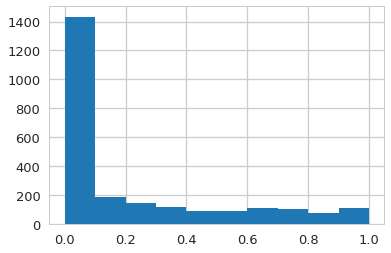

In [89]:
plt.hist(comp.loc[comp.values<1])
print(len(comp.loc[comp.values<.05]))

(array([137.,  83.,  81.,  56.,  67.,  69.,  79.,  52.,  63.,  51.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,  32., 177.,  64.,  80.,  43.,  50., 100.,  47.,  43.,  68.,
         60.]),
 array([4.51400003e-04, 1.15776740e-02, 2.27039480e-02, 3.38302220e-02,
        4.49564960e-02, 5.60827700e-02, 6.72090440e-02, 7.83353180e-02,
        8.94615920e-02, 1.00587866e-01, 1.11714140e-01, 1.22840414e-01,
        1.33966688e-01, 1.45092962e-01, 1.56219236e-01, 1.67345510e-01,
        1.78471784e-01, 1.8959

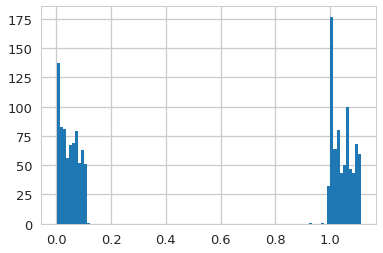

In [95]:
plt.hist(flares['flare_end_diff'], bins=100)

In [360]:
#flares = stats_green.loc[np.exp((stats_green['aic_flare']-stats_green['aic_gauss'])/2) < np.exp(-2)]
flaretimelim = flare_candidate.loc[flare_candidate['flare_end_diff'].astype(float) < 0.005]
flaretimelim

matchid        ra_x      dec_x  ztf_n_obs  \
54     10436241070214  283.642314  -3.435118        283   
98     10436412181238  283.051751  -0.844820        257   
99     10436412149325  283.186623  -0.843694        241   
101    10436331128105  286.592043  -0.848168        325   
122    10436302054738  281.062516  -3.956335        114   
124    10436232067832  285.415444  -3.956322        315   
174    10436462094951  281.501584  -1.773815        328   
186    10436052158894  285.166046  -5.409555        305   
199    10436032036347  287.695183  -6.114512        379   
272    10436532043592  284.596887   0.518446        217   
275    10436122050247  282.065951  -4.668176        245   
276    10436091048182  282.753900  -4.672731        283   
277    10436082185401  283.508388  -4.673342        166   
278    10436081167687  283.682114  -4.675979        284   
279    10436011001731  286.346511  -4.672896        352   
280    10436011049963  286.347612  -4.674654        347   
281    10436012166518  286.437809  -4.671962        204   
282    10436011116236  286.489767  -4.673067        319   
343    10436392015908  286.140619  -1.923385        243   
367    10436432044063  284.074156  -2.449601        237   
409    10436152143367  282.388936  -6.011888        315   
431    10436202092712  285.804321  -2.764495        255   
443    10436312007278  281.956514  -3.752490        167   
503    10436371018658  284.544256  -1.136087        360   
508    10488102147257  287.009217   0.912303        615   
577    10436481110045  287.573159   0.370300        266   
607    10488101115471  287.004035   1.065792        615   
635    10436292093805  281.232642  -2.753276        344   
636    10436162164349  287.418957  -2.760491        227   
647    10437462084834  287.975255  -2.411422        460   
...               ...         ...        ...        ...   
18243  10685071043348  291.837084  29.701835        745   
18336  11636522118266  296.395719  26.015257        136   
18534  10639192097821  296.509583  24.412153        359   
18875  10639222086246  293.919845  24.397288        287   
19127  10639242056720  292.972370  25.990434        504   
19178  11683242105901  291.026013  29.065800        441   
19231  10639082175855  293.024297  23.941433        312   
19336  10639222180670  293.424676  24.372196        242   
19435  11683092071677  290.015537  27.069813        342   
19461  10639381050698  293.539629  26.270639        269   
19489  10639331067370  295.735848  27.881092        433   
19643  10685021022953  293.368153  30.045100        242   
19857  11683542054240  292.465375  32.420670        259   
20508  10686141124933  294.139275  30.221176        712   
20512  10686142011225  294.145082  30.221633        734   
20732  10685361012197  291.716434  34.898040        245   
21058  10685201061854  291.755254  32.589241        194   
21063  10685202100459  292.365250  32.995903        344   
21153  11683502082078  294.155797  32.469073        564   
21311  10685132079616  286.886148  30.745745        329   
21487  11683542045806  291.946155  31.855196        292   
21488  10685231026889  291.951885  31.855544        275   
21701  10685072060821  291.884334  30.205429        329   
21823  10685322052857  294.222965  34.903279        580   
22480  10687452006541  301.642106  34.988538        263   
22761  10686062057683  299.059752  30.232369        266   
22808  10640532007033  301.548514  29.736950        276   
22809  10640532007160  301.548829  29.734789        258   
23962  11684632030385  296.887950  32.013876        151   
24166  10686162089537  301.667955  32.666332        273   

       exploded_unique_matchids_index  unique_matchids_exploded  \
54                                  1            10436242117711   
98                                  1            10436412181238   
99                                  0            10436412149325   
101                                 0            10436332134881   
122                 

(array([ 80.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  79.,
        109.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,
          5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  49.,
         58.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  34.,
         21.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  35.,
         22.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  15.,
         40.]),
 array([0.0004514 , 0.00049365, 0.00053589, 0.00057814, 0.00062038,
        0.00066263, 0.00070488, 0.00074712, 0.00078937, 0.00083161,
        0.00087386, 0.00091611, 0.00095835, 0.0010006 , 0.00104284,
        0.00108509, 0.00112734, 0.00116958, 0.00121183, 0.00125407,
        0.00129632, 0.00133857, 0.00138081, 0.

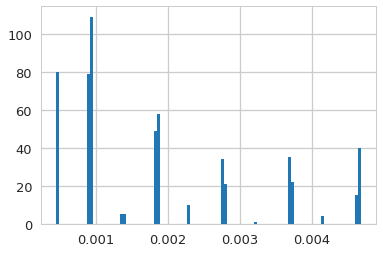

In [361]:
plt.hist(flaretimelim['flare_end_diff'], bins=100)

### To determine the luminosity inorder to get the equivduration 

This equation was created for gaia fluxes by Jim

def LUM(gflux, plx, zp='AB', mag='G'):
    #from https://www.cosmos.esa.int/web/gaia/iow_20180316
    G0 = 25.7915509947 # AB_ZP mag

    #from Table 5.4: https://gea.esac.esa.int/archive/documentation/GDR2/Data_processing/chap_cu5pho
    #/sec_cu5pho_calibr/ssec_cu5pho_calibr_extern.html
    lp = 623.06 * u.nm # pivot wavelength of G filter

    m_G = -2.5 * np.log10(gflux) + G0
    F_AB_JY = 3631 * 10**(-0.4 * m_G)
    F_AB = F_AB_JY  * 1e-23 * u.erg/u.s/u.cm/u.cm/u.Hz

    dist = (1000./plx) * u.pc
    L = ((F_AB * dist**2) * (const.c/lp).to('Hz')).to(u.erg / u.s)
    return L.value

#And then you can call it like this:
LL = LUM(gaialim['phot_g_mean_flux'].values, gaialim['parallax'].values)

### How to get luminosity:

$$dm = m - M = 5 log(d) - 5$$
$$dm = m - M = 5 log(d) - 5 + A$$
$$M_2 - M_1 = 2.5 log(f_1 /f_2)$$
$$L = f 4 \pi d^2$$


<br> This is the paper for Pan-STARRS1: https://arxiv.org/pdf/1203.0297.pdf. It describes the use and equations of the AB magnitude system. It also gives the Pivot Wavelength for the r band as: 617nm

(The AB mag system is originally found in http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1983ApJ...266..713O&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf)

$$m_{ab}(v) = −2.5 log(f_ν/3631 Jy)$$
$$m_{ab}(v) = −48.600 − 2.5 log(f_ν[erg/sec/cm2/Hz]) $$

Solve for flux 

<br> So for if we plug in the absolute magnituded given by G19 we will get the flux at 10 parsec
<br> Rearanged for flux the equation is:
$$f_{10pc} = 10 ^ {\frac{M + 48.6}{-2.5}}$$

<br> This gives the flux based on frequency. We need it to be based off wavelength so we need the pivot wavelength of the band to convert it.

$$<f_v> = <f_{\lambda}>\frac{\lambda_p^2}{c} $$ 
$$<f_{\lambda}> = <f_v>\frac{c}{\lambda_p^2}$$

<br> $f_v$ and $f_{\lambda}$ are flux per something, either frequency or wavelength. So to have just the flux value I beleive you can have $f_{\lambda}*\lambda_p$ which gives it the units of flux. In this case the the equation for flux is then:
$$f = f_{\lambda}*\lambda_p$$
$$f = <f_v>\frac{c}{\lambda_p}$$
$$f = 10 ^ {\frac{M + 48.6}{-2.5}} *\frac{c}{\lambda_p}$$


In [39]:
def LUM(M_r):
    '''
    This function produces the luminosity of a star based off of its absolute magnitude.
    This function works in the AB Magnitude system and is catered for the PanSTARRS r band.
    This can be altered to work for any band by changing the pivot wavelength. 
    '''
    flux_nu = 10 ** ((M_r + 48.6) / -2.5)
    flux_nu = flux_nu * (u.erg/u.s/u.cm/u.cm/u.Hz)
    #Band used is r from Pan-STARRS 1 as described in Green19 
    lp = 617 * u.nanometer #pivot wavelength for the band used
    flux_lambda = flux_nu * const.c / lp 
    lum = flux_lambda *  4 * np.pi * (10 * u.parsec) ** 2
    #16.847 − 2.5 log
    #m  = 16.847 − 2.5 log(fγ[ph/sec/cm2/dln λ]). 
    
    return lum.to(u.erg/u.s)

In [40]:
np.log10(LUM(4.6).value)

33.484446493354255

In [41]:
np.log10(const.L_sun.to(u.erg/u.s).value)

33.58297192910481

### Determine flare rate by spectral type

Spectral type will be given by Mr_50 but I dont really know what that means.

Need to correct Mr for reddening?  A_V = Constance * E(B-V), where A_V is extinction and E(B-V) is reddening. 

Taken from the green paper:

A(E) is the extinction in the observed passbands, assumed to be a linear function of reddening, E. We assume that for each star, extinction is given by A(E) = E * R 

E, the extinction, is given by the Green data. We used Mr so the R values we use is 2.617 (take from table 1 in the green paper). So E * 2.617 gives the reddening.

https://arxiv.org/pdf/1905.02734.pdf

Have the machinary for log luminosites, flare energy, and then work on the flare frequency diagram, make andother color magnitudes, make flare selections 


need to know: t_exposure (number of obs * esposure time)
    frequency diagram: log nu (number of flares /day)
    sorted by flare energry ( flare_energrysssort()(ii-1) this sorts big to small, this is x array
    y array- np.arange(1,n+i)/total observed time in days, this is a counting array scalled by observatuiontime 
    plot 
    log everything
    
    binthe CMD, make contours, there should be equal number of flares per bin
    plot frequ:do this for each bin of cmb
    

### Extinction
Gaia DR2 paper with extinction info: https://www.aanda.org/articles/aa/pdf/2018/08/aa32843-18.pdf

The original paper that shows where the equations are derived from: https://arxiv.org/pdf/1802.01670.pdf

Using the magnitudes from gaia we will use these equations:
$$k_X = c_1 + c_2(G_{BP} − G_{RP})_0 + c_3(G_{BP} − G_{RP})^2_0 + c_4(G_{BP} − G_{RP})^3_0+c_5A_0 + c_6A^2_0 + c_7(G_{BP} − G_{RP})_0A_0$$


$$k_X = A_X/A_0$$
$A_0$ is defined as the interstellar extinction at $\lambda$ = 555 nm
$$A_0 = 3.1~E(B − V)$$
So the extinction factor is: $A_X = k_X*A_0 = k_X * 3.1 ~E(B − V)$

We will use the reddening values, E, given by G19. 

To determine the absolute magnitudes including extinction use this distance modulus:
$$dm = m_{\lambda}-M_{\lambda}=5 log(r_{pc}) - 5 + A_{\lambda}$$
Rearranged for M:
$$M_{\lambda} = m_{\lambda} - 5 log(r_{pc}) + 5 - A_{\lambda}$$

Since the distance modulus is wavelength depended I will have to take that into account. I start with the green dm but since I am using gaia data I will need to convert it.

$$dm_{green} = 5 log(r_{pc}) - 5 + A_{green} \Rightarrow dm_{green} - A_{green}= 5 log(r_{pc}) - 5 $$
$$dm_{gaia} = 5 log(r_{pc}) - 5 + A_{gaia} \Rightarrow dm_{gaia} - A_{gaia}= 5 log(r_{pc}) - 5 $$
$$dm_{gaia} - A_{gaia} = dm_{green} - A_{green} \Rightarrow dm_{gaia} = dm_{green} - A_{green} + A_{gaia} $$
$$dm_{gaia} = m_{gaia} - M{gaia}$$
$$M_{gaia} = m_{gaia} - dm_{gaia}$$
$$M_{gaia} = m_{gaia} - (dm_{green} - A_{green} + A_{gaia})$$

To get $A_{green}$ use the coefficient given in the green paper for the r band and multipy it by the extinction: $A_{green}$ = 2.617 * $E(B − V)_{green}$


In [42]:
def extinction_coef(GBP, GRP, A0, c1, c2, c3, c4, c5, c6, c7):
    k = (c1 + c2*(GBP - GRP) + c3*(GBP - GRP)**2 + c4*(GBP - GRP)**3
         + c5*A0 + c6*A0**2 + c7*(GBP - GRP)*A0)
    return k

In [43]:
def cmd_mags(df, energy=False):
    
    g_c1,g_c2,g_c3,g_c4,g_c5,g_c6,g_c7 = [0.9761, -0.1704, 0.0086, 0.0011, -0.0438, 0.0013, 0.0099]
    bp_c1,bp_c2,bp_c3,bp_c4,bp_c5,bp_c6,bp_c7 = [1.1517, -0.0871, -0.0333, 0.0173, -0.0230, 0.0006, 0.0043]
    rp_c1,rp_c2,rp_c3,rp_c4,rp_c5,rp_c6,rp_c7 = [0.6104, -0.0170, -0.0026, -0.0017, -0.0078, 0.00005, 0.0006]
    
    A_0 = 3.1 * df['E_50']
    A_green = 2.617 * df['E_50']
    
    k_g = extinction_coef(df['phot_bp_mean_mag'],df['phot_rp_mean_mag'],A_0,g_c1,g_c2,g_c3,g_c4,g_c5,g_c6,g_c7)
    A_g = k_g * A_0
    k_bp = extinction_coef(df['phot_bp_mean_mag'],df['phot_rp_mean_mag'],A_0,bp_c1,bp_c2,bp_c3,bp_c4,bp_c5,bp_c6,bp_c7)
    A_bp = k_bp * A_0
    k_rp = extinction_coef(df['phot_bp_mean_mag'],df['phot_rp_mean_mag'],A_0,rp_c1,rp_c2,rp_c3,rp_c4,rp_c5,rp_c6,rp_c7)
    A_rp = k_rp * A_0
    
    #Need to check in how to use the mean mag
    g_mag_value = df['phot_g_mean_mag'] - df['dm_50'] - A_g + A_green
    bp_mag_value = df['phot_bp_mean_mag'] - df['dm_50'] - A_bp + A_green
    rp_mag_value = df['phot_rp_mean_mag'] - df['dm_50'] - A_rp + A_green
    bp_rp_mag_value = bp_mag_value - rp_mag_value
    
    if energy == False:
        cmd_mag = pd.DataFrame(data = {'Mr_50':df['Mr_50'], 'bp_rp_mag':bp_rp_mag_value, 
                                       'g_mag':g_mag_value, 'A_g': A_g, 'A_bp': A_bp, 'A_rp':A_rp, 
                                       'E_50':df['E_50']})
    if energy == True:
        cmd_mag = pd.DataFrame(data = {'Mr_50':df['Mr_50'], 'bp_rp_mag':bp_rp_mag_value, 
                                       'g_mag':g_mag_value, 'A_g': A_g, 'A_bp': A_bp, 'A_rp':A_rp, 
                                       'E_50':df['E_50'],'flare_energy':df['flare_energy']})    
    

    return cmd_mag

In [44]:
#for each bin make a frequency plot:
def plotenergyfreq(df_flare, df_all):
    lum = LUM(df_flare['Mr_50'].values)
    energy = lum.value * df_flare['equivdur']
    df_new = df_flare
    df_new['lum'] = np.log10(lum.value)
    df_new['flare_energy'] = np.log10(energy)

    df_new = df_new.sort_values(by=['flare_energy'],ascending=False)
    totaltime = np.sum(df_all['ztf_n_obs'])*30 #this is in seconds of exposure time
    rate = np.arange(1, len(df_new) +1) / totaltime
    #print(rate,df_new['flare_energy'])
    plt.ylabel('$\\nu$ flares/day', size=15)
    plt.xlabel('Flare Energy [log10(erg)]')
    plt.plot(df_new['flare_energy'],np.log10(rate))
    plt.show()
    return df_new



In [80]:
stats_gaia.head()

matchid      ra_x_x   dec_x_x  ztf_n_obs  \
0  10436452014231  281.563029 -1.082558        366   
1  10436371015768  284.446460 -1.082794        332   
2  10436322015439  287.293170 -1.078260        321   
3  10436322015461  287.294288 -1.078611        287   
4  10436322063804  287.295801 -1.065334        265   

   exploded_unique_matchids_index  unique_matchids_exploded  \
0                               1            10436452014231   
1                               1            10436372069179   
2                               1            10436322015439   
3                               1            10436322015461   
4                               0            10436322063804   

                             match_file     id   aic_flare   chi_flare  \
0  ztf_000436_zr_c12_q2_match_programid  14231  129.698249  121.698251   
1  ztf_000436_zr_c10_q2_match_programid  69179   44.334414   36.334414   
2  ztf_000436_zr_c09_q1_match_programid  15439   60.788200   52.788198   
3  ztf_000436_zr_c09_q1_match_programid  15461   72.679340   64.679338   
4  ztf_000436_zr_c09_q1_match_programid  63804   94.837449   86.837450   

   dof_flare  red_flare  aic_gauss  chi_gauss  dof_gauss  red_gauss  \
0         36   3.380507  97.867209  89.867209         36   2.496311   
1         21   1.730210  61.079583  53.079582         21   2.527599   
2         24   2.199508  52.085039  44.085037         24   1.836877   
3         20   3.233967  52.970680  44.970679         20   2.248534   
4         22   3.947157  69.132487  61.132487         22   2.778749   

       exp_comp  perc_comp            fl_indx    equivdur      ra_y_x  \
0  1.224552e-07 -31.831041  [183 184 185 186]  183.796218  281.563019   
1  4.326804e+03  16.745169            [2 3 4]  232.906635  284.446465   
2  1.288643e-02  -8.703161            [5 6 7]   16.524984  287.293155   
3  5.251930e-05 -19.708660            [4 5 6]  176.661595  287.294294   
4  2.619620e-06 -25.704962          [4 5 6 7]   79.380627  287.295784   

    dec_y_x      xpos      ypos    flare_time      end_time  flare_end_diff  \
0 -1.082581   131.631   875.921  58348.299074  58348.327107        0.025729   
1 -1.082873  3060.650  1112.854  58347.212349  58348.327107        1.112917   
2 -1.078254  2625.031  1085.325  58347.214641  58348.327107        1.110625   
3 -1.078590  2620.983  1086.522  58347.214641  58348.327107        1.110625   
4 -1.065344  2615.941  1039.090  58347.216482  58348.327107        1.107419   

   n_catflags          axs_id n_obs      ra_x_y   dec_x_y  \
0           3  10436452014231   215  281.563029 -1.082558   
1           5  10436372069179   210  284.446460 -1.082794   
2           0  10436322015439   211  287.293170 -1.078260   
3           0  10436322015461   206  287.294288 -1.078611   
4           0  10436322063804   186  287.295801 -1.065334   

             source_id     bp_rp  phot_g_mean_mag  \
0  4260081784915833088  2.336857        18.040129   
1  4265148167050235904  1.326908        18.253607   
2  4262334173183276416  1.273684        19.167152   
3  4262334168871011200  1.561991        19.736557   
4  4262334276241336064  1.384005        19.275442   

   phot_g_mean_flux_over_error  phot_bp_mean_mag  phot_rp_mean_mag  a_g_val  \
0                   505.582825         19.283669         16.946812      NaN   
1                   475.497803         18.598072         17.271164      NaN   
2                   280.719238         19.587952         18.314268      NaN   
3                   150.552460         20.292562         18.730572      NaN   
4                   235.849075         19.750185         18.366180      NaN   

   parallax  parallax_error  lum_val       axsdist      ra_y_y   dec_y_y  \
0  0.693888        0.186704      NaN  3.509775e-07  281.563029 -1.082558   
1 -0.016704        0.269977      NaN  5.249985e-07  284.446460 -1.082794   
2  0.375260        0.347421      NaN  1.432535e-06  287.293170 -1.078260   
3  0.658261        0.518224      NaN  7.084142e-07  287

/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


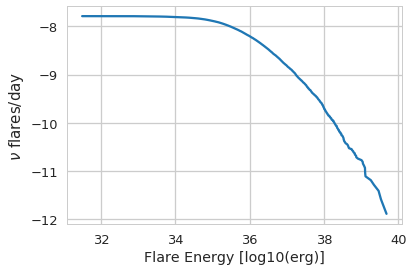

In [83]:
flare_energy = plotenergyfreq(stats_gaia, green_gaia)

In [86]:
flare_lim = flare_energy.loc[((flare_energy['red_gauss'] - flare_energy['red_flare']) / flare_energy['red_flare'] > .25)&
                             (flare_energy['dof_flare']>10)]
print(len(flare_lim))

908


/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


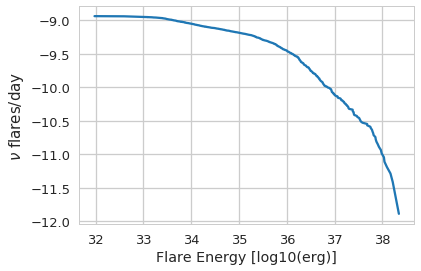

matchid      ra_x_x    dec_x_x  ztf_n_obs  \
11642  10687301036778  301.812053  32.269855        466   
9605   10639032115132  296.405902  22.711553        333   
6571   10591292031798  292.961259  18.243274        371   
11718  10686392146896  300.342549  34.102343        246   
9479   10639042143119  294.729679  23.624203        195   
3257   10539232168940  286.445876  10.133943        335   
11748  11684342080761  301.754751  30.225432        456   
12547  10686072158470  300.294007  30.073229        320   
5732   10592452149890  299.900477  20.763059        232   
11866  11684392099142  301.306506  30.145287        107   
160    10436082185401  283.508388  -4.673342        166   
215    10436112187349  283.636362  -5.737339        202   
3263   10539232152673  286.139201  10.116336        218   
12222  10686232147520  300.257791  31.678193        290   
3515   10539162147399  287.766743  11.533991        184   
307    10488102147257  287.009217   0.912303        615   
12024  10686201074025  300.374210  32.626664        326   
3725   10540082174480  291.603437   9.128622        215   
12081  10686062088730  298.429340  30.316627        303   
3312   10539202098381  286.589958  11.558595        252   
6418   10591251078688  294.956210  18.624383        474   
12023  10686202034461  300.373506  32.629705        442   
5455   10541521084722  300.100025  14.708537        294   
3389   10539091004510  283.461417   9.656199        409   
12314  10686072113404  299.805223  29.815292        179   
12465  10686271116653  298.035956  32.190951        503   
5858   10591262097889  295.008294  17.816029        280   
3190   10539321059222  287.925515  13.388459        331   
3402   10539212012746  285.689707  11.455572        342   
3383   10539162062314  288.174281  10.986805        332   
...               ...         ...        ...        ...   
9475   10639542041094  293.987205  28.333470        431   
10861  11726241011582  288.343506  36.463237        373   
7936   10592061038258  303.559800  15.880413        326   
4663   10541282068793  296.228624  11.254154        255   
1160   10437012011013  294.117319  -4.800491        298   
2449   10538621010888  274.541253  14.268630        476   
8747   10638242027203  285.105004  25.516096        300   
6857   10591582018167  294.581721  21.288955        461   
12360  10687132081764  302.259720  30.764115        837   
1370   10540152139520  289.478846   8.315793        441   
5622   10591582006185  294.524737  21.591897        426   
978    10437082017359  291.066888  -4.884333        290   
2324   10538271049110  277.744955  10.560100        312   
4567   10541522059283  300.644975  14.942400        196   
8713   10638252049011  284.215658  25.494145        314   
7044   10592561017229  302.913591  22.379661        312   
1595   10487351011397  284.543642   5.049756        372   
2253   10538102016249  276.841841   8.622556        127   
10303  10685561026721  289.506085  36.291985        376   
8583   10638252055041  283.787966  26.006203        356   
6653   10591591006555  296.000378  21.521505        512   
384    10437452026547  287.980941  -1.216226        653   
2901   10538202127487  279.323373  11.440202        219   
2910   10538121068797  275.741773   9.110747        351   
3037   10538231027851  278.855424  10.295201        354   
4629   10541272031585  298.720910  10.314593        297   
4722   10541551001649  300.134410  14.595202        286   
7890   10592431072015  302.481677  19.162520        349   
9238   10639371023423  293.705687  27.559520        509   
12228  10686311019515  295.805746  32.058459        397   

       exploded_unique_matchids_index  unique_matchids_exploded  \
11642                               4            10686192003821   
9605                                0            10639032115132   
6571                                0            10591292031798   
11718                               0            10686392146896   
9479                

In [85]:
plotenergyfreq(flare_lim, green_gaia)

In [ ]:
flare_lim.head()

In [87]:
cmd_mag = cmd_mags(green_gaia)

In [88]:
cmd_flare = cmd_mags(flare_energy, energy=True)

In [89]:
cmd_flarelim = cmd_mags(flare_lim, energy=True)

In [90]:
print(len(cmd_mag), len(green_gaia))

87044359 87044359


In [91]:
cmd_maglim = cmd_mag.loc[(cmd_mag['E_50']>0) &
                         (cmd_mag['A_bp']<1) &
                         (cmd_mag['A_rp']<1) 
                        ]
cmd_mag_flarelim = cmd_flare.loc[(cmd_flare['E_50']>0) &
                                 (cmd_flare['A_bp']<1) &
                                 (cmd_flare['A_rp']<1)]

In [92]:
cmd_mag_flarelim2 = cmd_flarelim.loc[(cmd_flarelim['E_50']>0) &
                                     (cmd_flarelim['A_bp']<1) &
                                     (cmd_flarelim['A_rp']<1)]

In [93]:
cmd_mag_flarelim2.head()

Mr_50  bp_rp_mag     g_mag       A_g      A_bp      A_rp      E_50  \
5560   3.05   0.829428  4.001810  0.742298  0.999800  0.570476  0.320296   
4129   1.15   1.079613  2.092741  0.701031  0.966731  0.553890  0.315185   
4721   4.95   0.832471  5.479743  0.380142  0.496506  0.280321  0.154753   
2089   2.75   0.844251  3.273173  0.393517  0.515084  0.291102  0.160893   
6405   3.40   0.625869  3.845143  0.411442  0.529131  0.295847  0.161986   

      flare_energy  
5560     36.887627  
4129     36.843643  
4721     36.813772  
2089     36.748961  
6405     36.725503

Text(0.5, 0, 'bp_rp_mag')

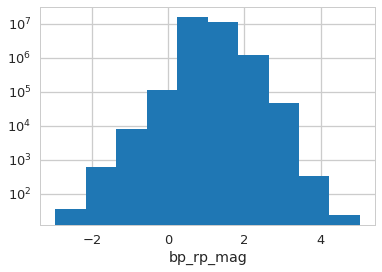

In [69]:
#cmd_mag.loc[cmd_mag['A_bp']]
plt.hist(cmd_maglim['bp_rp_mag'], log=True)
plt.xlabel('bp_rp_mag')

### Make CMD

In [94]:
#  MIST isochrones
Mnames = ('EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 
          'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Bessell_V', 
          'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 
          'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev', 
          'Gaia_RP_DR2Rev', 'TESS', 'phase')

Mfile = 'MIST_v1.1_feh_p0.25_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'
#MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'
mist = pd.read_table(Mfile, delim_whitespace=True, comment='#', names=Mnames)

mist_ms1 = np.where((mist['phase']==0) & 
                    (mist['log10_isochrone_age_yr'] == 9.))[0][::-1]
                    #&                     (mist['Gaia_G_DR2Rev'] > 2))

In [97]:
bins_Mrlim = bins_Mr(flare_lim)
bins_Mrlim

[-0.9, 3.95, 5.6, 7.8, 10.325001, 15.9]

In [98]:
bins_gmag(cmd_mag_flarelim2)

[2.0927415, 5.8419623, 7.1672087, 9.634467, 10.801741, 12.864565]

In [74]:
mist_mw = mist.loc[((mist['phase']==0) & 
                    (mist['log10_isochrone_age_yr'] == 9.))]
                   #Mass_cuts = np.interp(mist['Bessell_R'], mist['star_mass'], bins_Mrlim)

#Should give 4 masses. Goal: put them on the plot
mist_mw.loc[(mist_mw['Gaia_G_DR2Rev']>2) & (mist_mw['Gaia_G_DR2Rev']<2.2)]['star_mass']

66688    1.741867
66689    1.758517
66690    1.780206
Name: star_mass, dtype: float64

In [75]:
mist_ms2 = np.where((mist['star_mass']<=1) & 
                    (mist['log10_isochrone_age_yr'] == 9.))[0][::-1]
                    #&                     (mist['Gaia_G_DR2Rev'] > 2))

In [76]:
mist['Gaia_BP_DR2Rev'].values[mist_ms2]

array([ 1.0101984e+01,  1.0073555e+01,  1.0014084e+01,  9.9542800e+00,
        9.8894920e+00,  9.8298550e+00,  9.7687130e+00,  9.7208320e+00,
        9.6560080e+00,  9.5950590e+00,  9.5585160e+00,  9.4954150e+00,
        9.4401480e+00,  9.3764770e+00,  9.3249460e+00,  9.2641470e+00,
        9.2126750e+00,  9.1803770e+00,  9.1362550e+00,  9.0853630e+00,
        9.0417820e+00,  8.9937830e+00,  8.9533520e+00,  8.9305450e+00,
        8.8863390e+00,  8.8499860e+00,  8.8069930e+00,  8.7698970e+00,
        8.7337360e+00,  8.7005120e+00,  8.6736050e+00,  8.6328410e+00,
        8.5827050e+00,  8.5139980e+00,  8.4661450e+00,  8.3813840e+00,
        8.2876260e+00,  8.1791460e+00,  8.0897730e+00,  7.9853830e+00,
        7.9018600e+00,  7.8251150e+00,  7.7539190e+00,  7.7031200e+00,
        7.6477380e+00,  7.6041390e+00,  7.5602320e+00,  7.5122410e+00,
        7.4697030e+00,  7.4426340e+00,  7.3658190e+00,  7.3163830e+00,
        7.2844340e+00,  7.2102990e+00,  7.1544010e+00,  7.1041940e+00,
      

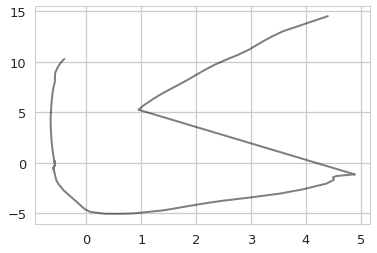

In [77]:
plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms2] - mist['Gaia_RP_DR2Rev'].values[mist_ms2], 
         mist['Gaia_G_DR2Rev'].values[mist_ms2], c='black', lw=2, alpha=0.5, label = '1 Gyr MIST')

In [78]:
len(cmd_mag_flarelim2)

188

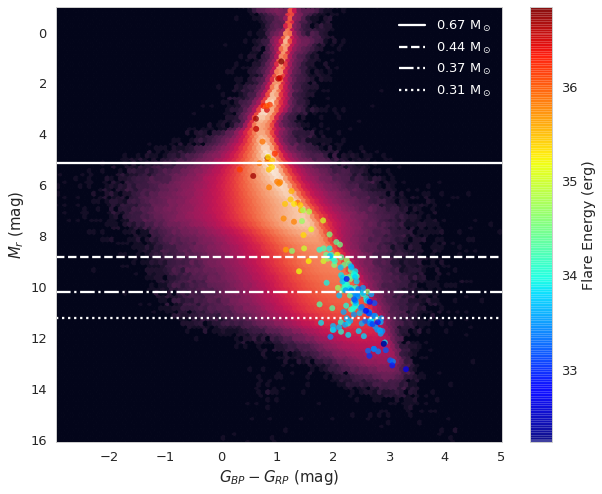

In [101]:
#LL = LUM(df['Mr_50'].values)

fig = plt.figure(figsize=(10,8))
plt.xlabel('$G_{BP} - G_{RP}$ (mag)', size=15)
plt.ylabel('$M_r$ (mag)', size=15)


plt.axhline(y=bins_Mrlim[1], color='w', linestyle='-', label='0.67 M$_\odot$')
plt.axhline(y=bins_Mrlim[2], color='w', linestyle='--', label='0.44 M$_\odot$')
plt.axhline(y=bins_Mrlim[3], color='w', linestyle='-.', label='0.37 M$_\odot$')
plt.axhline(y=bins_Mrlim[4], color='w', linestyle=':', label='0.31 M$_\odot$')
legend = plt.legend()
plt.setp(legend.get_texts(), color='w')

plt.hexbin(cmd_maglim['bp_rp_mag'], cmd_maglim['Mr_50'], bins='log')
plt.scatter(cmd_mag_flarelim2['bp_rp_mag'], cmd_mag_flarelim2['Mr_50'], 
            alpha=0.75, s=30, c=cmd_mag_flarelim2['flare_energy'],
            cmap=plt.cm.get_cmap('jet'), label='Flaring Stars') 

plt.colorbar(label='Flare Energy (erg)')

plt.gca().invert_yaxis()

#fig.savefig('CMD_extinction_correction.png')

In [58]:
def veiwlimitedcurves(flares_energy):
    dflim = flares_energy.loc[((flares_energy['red_gauss'] - flares_energy['red_flare']) / flares_energy['red_flare'] > 1)&
                              (flares_energy['dof_flare']>10)&
                              (flares_energy['Mr_50']<5)]
    
    #dflim = flares_energy.loc[flares_energy['Mr_50']<5]                        
    print(len(dflim))
    for i in range(len(dflim)):
        folder = 'found_flares_' + dflim['match_file'].values[i].split('_')[1][3:] + '/'
        filepath = folder + dflim['match_file'].values[i] + '_id_' + str(dflim['id'].values[i]) + '*.png'
        filepath = glob.glob(filepath)
        for j in filepath:
            display(Image(filename=j))

58


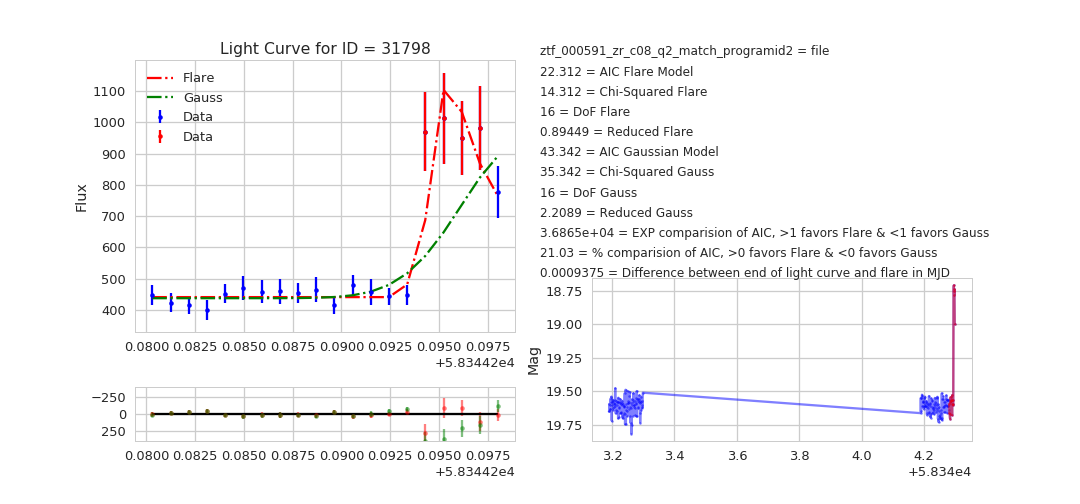

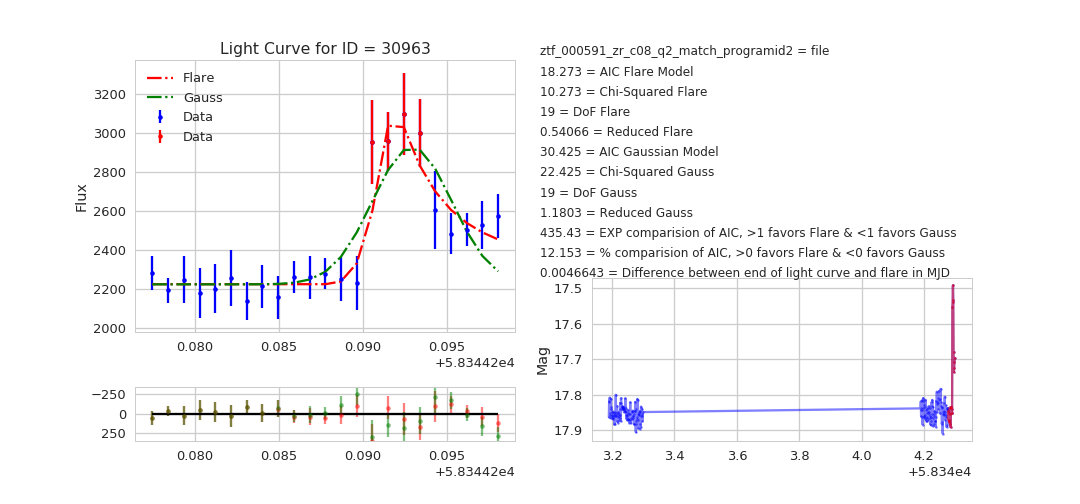

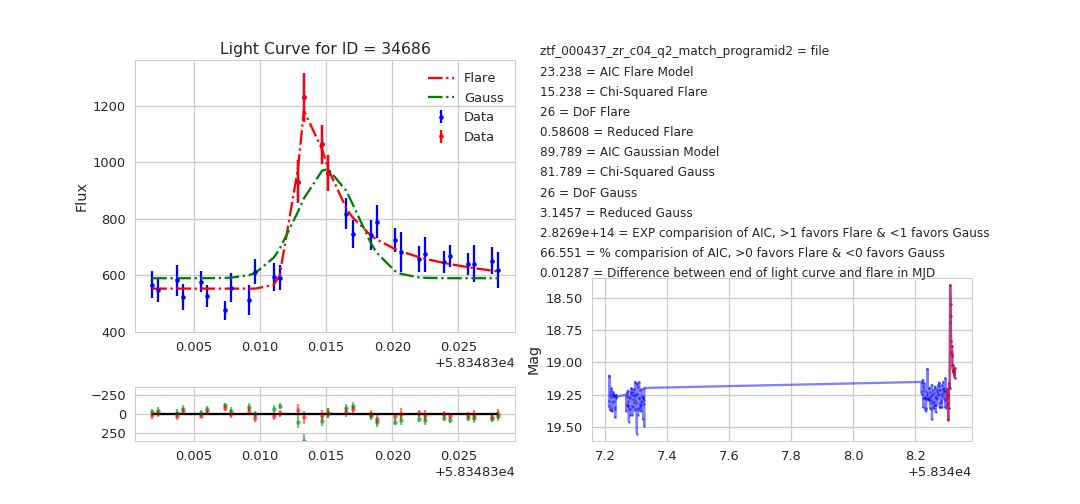

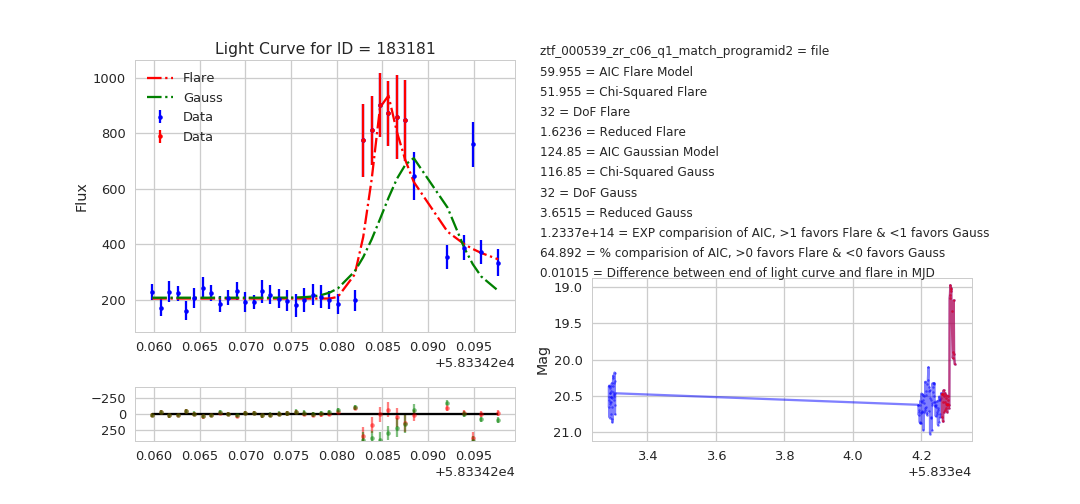

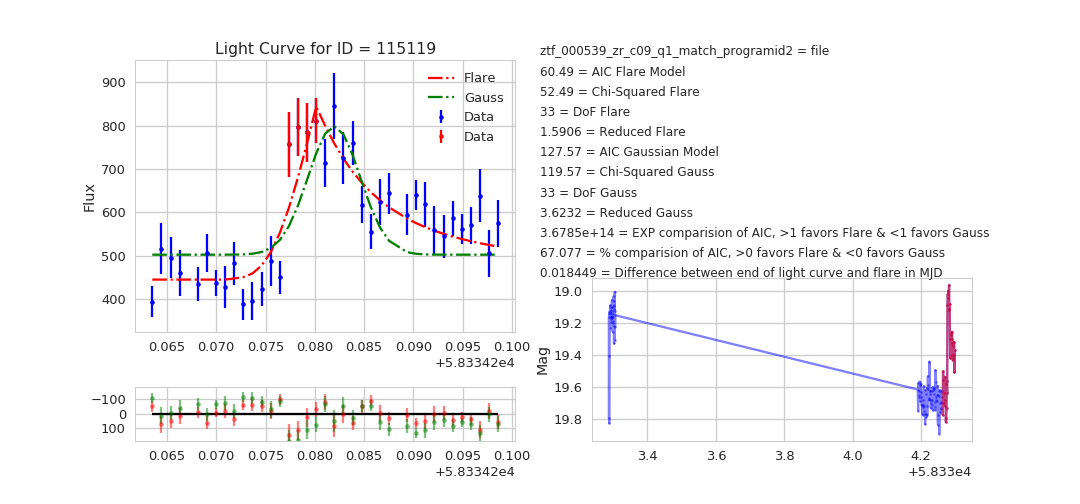

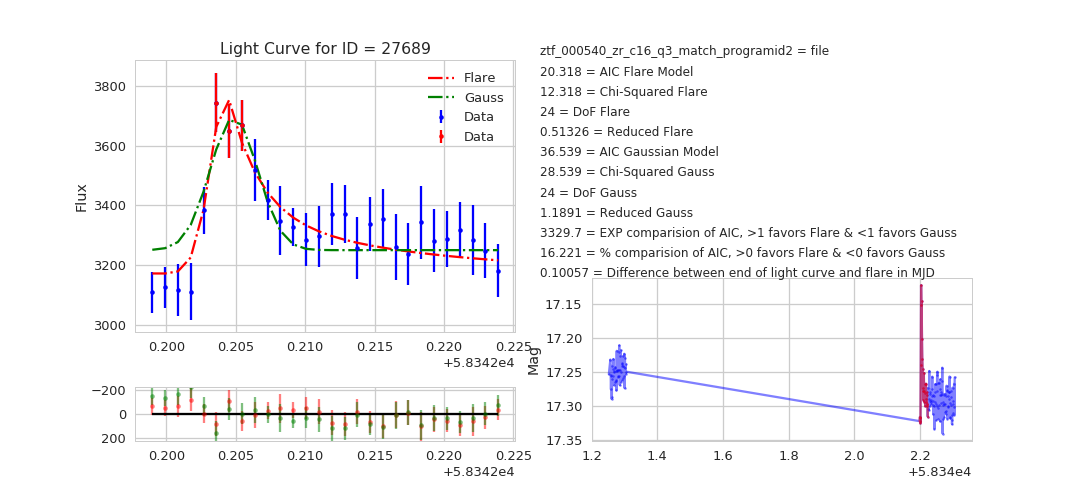

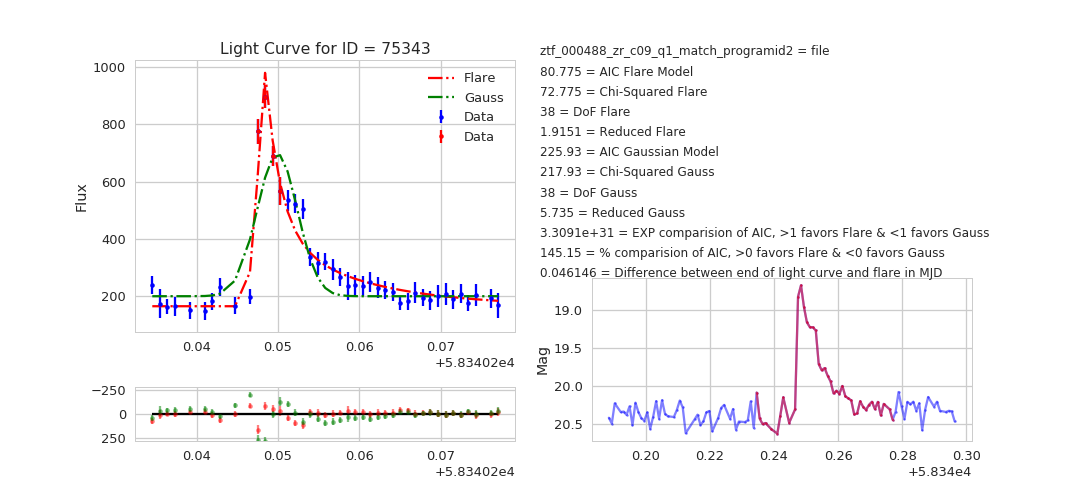

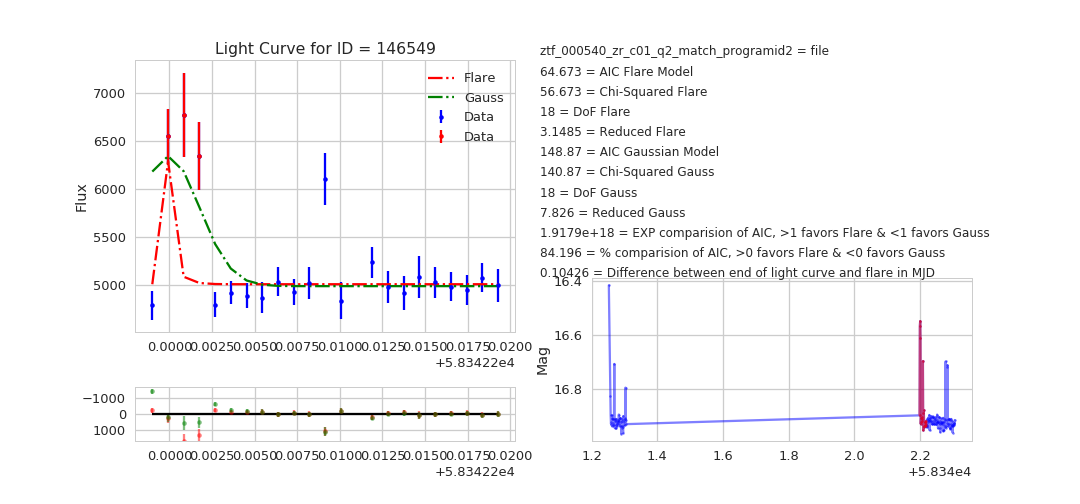

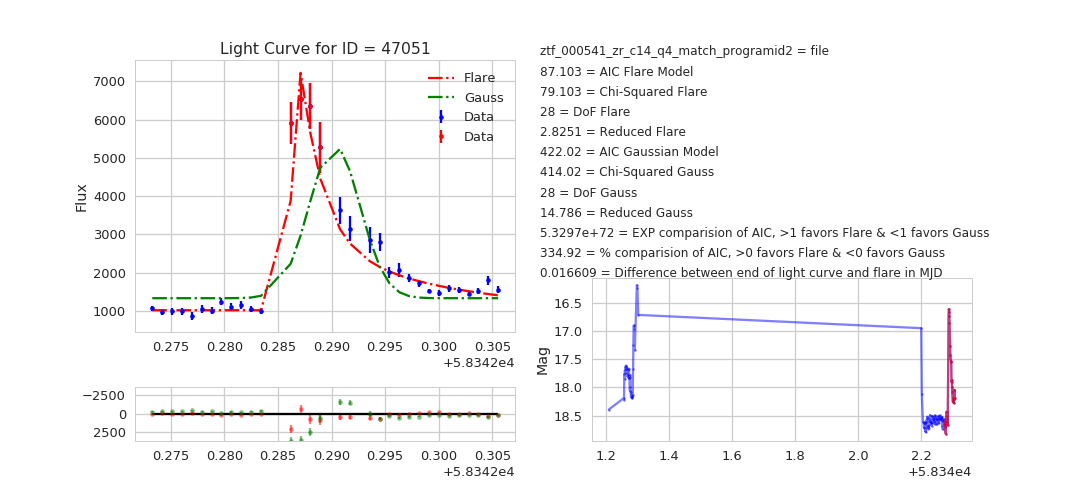

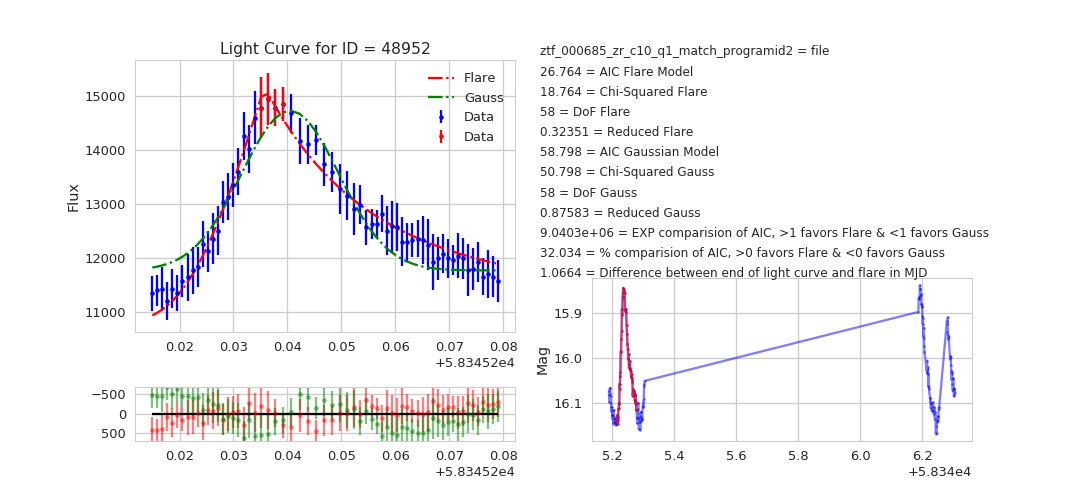

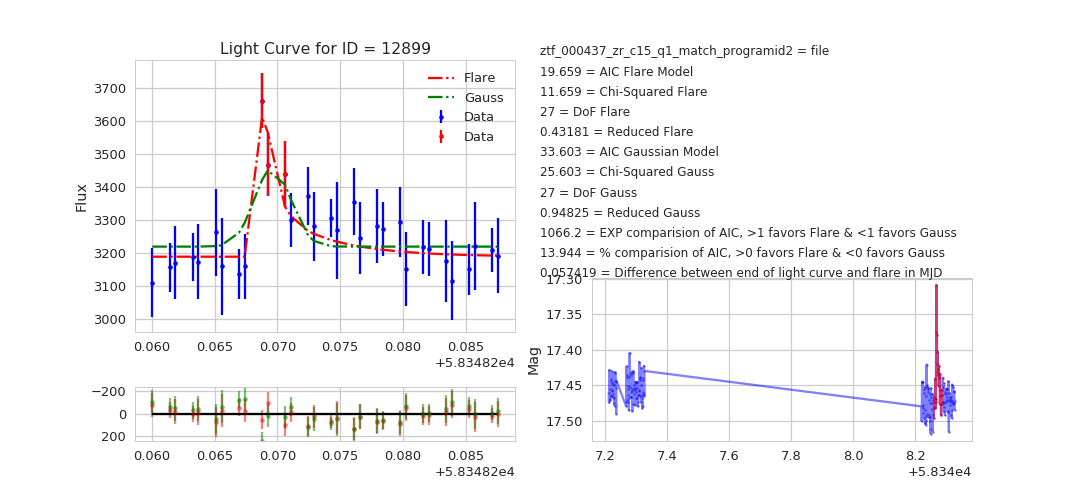

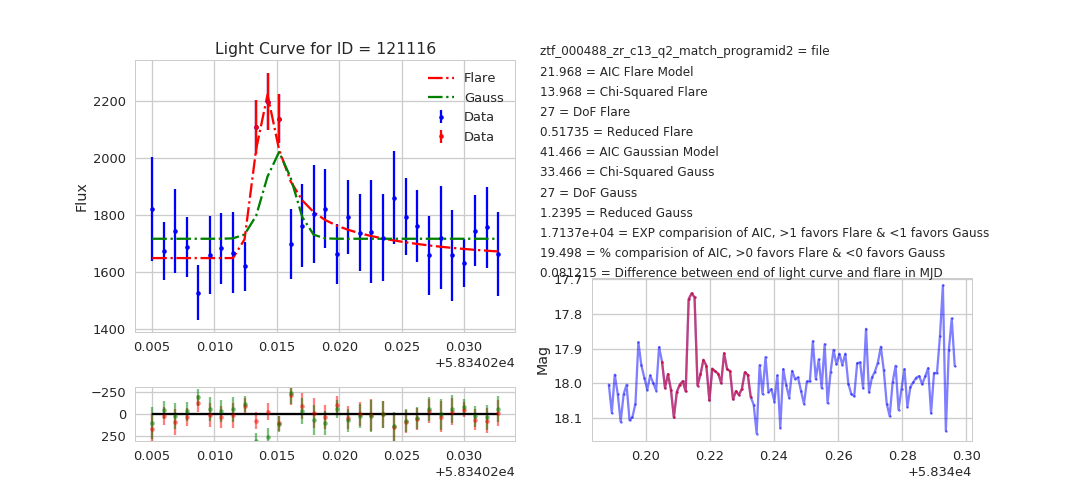

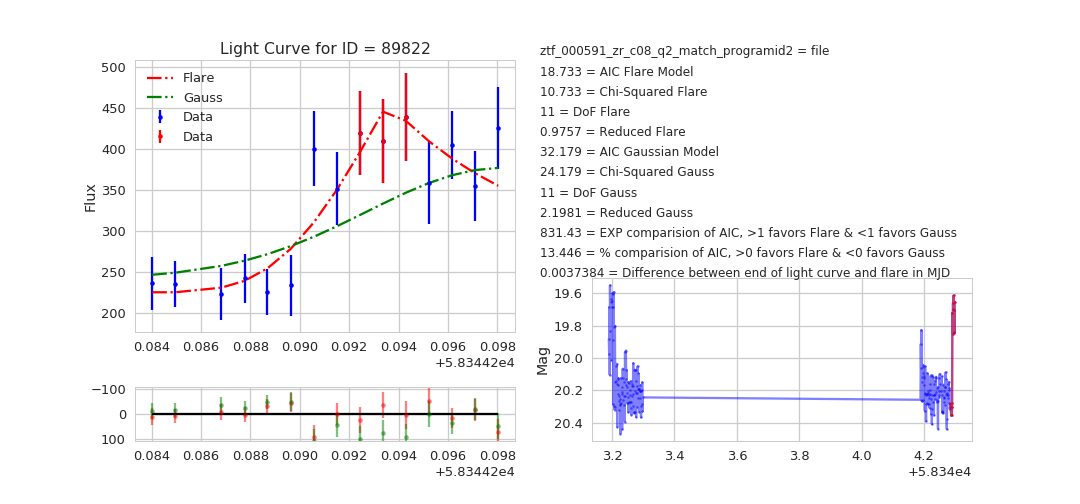

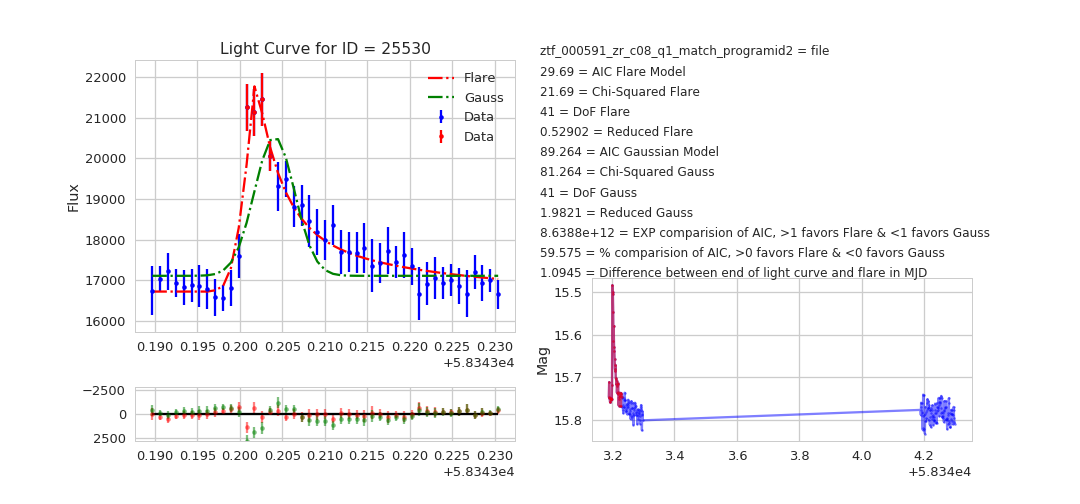

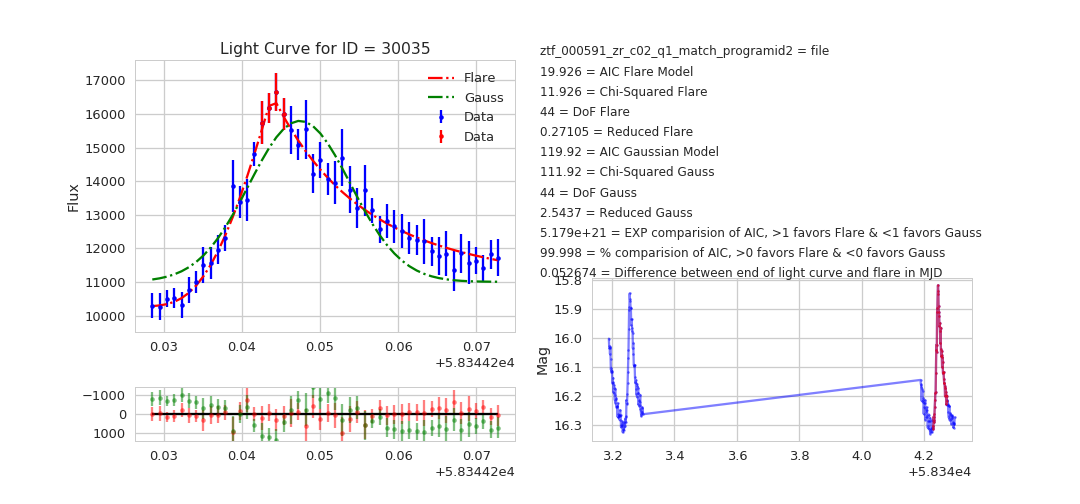

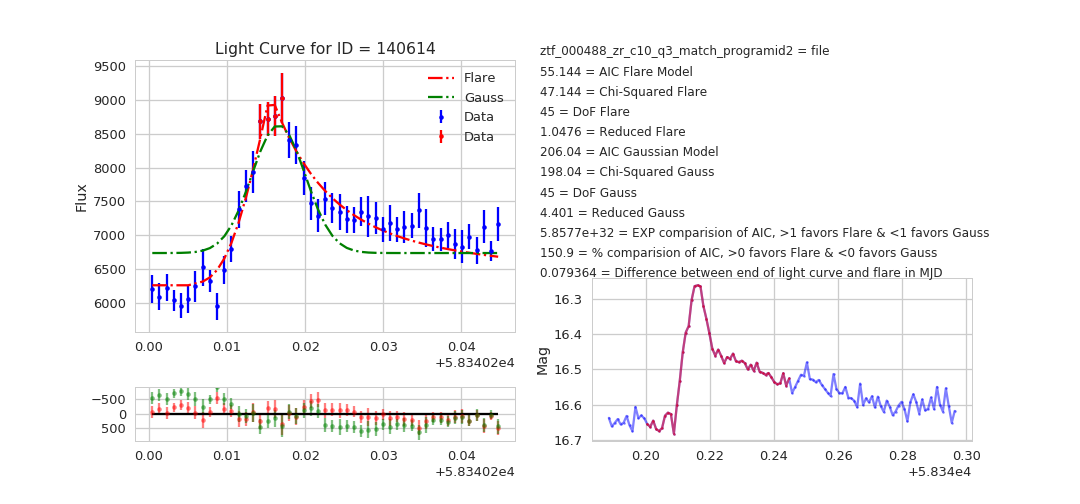

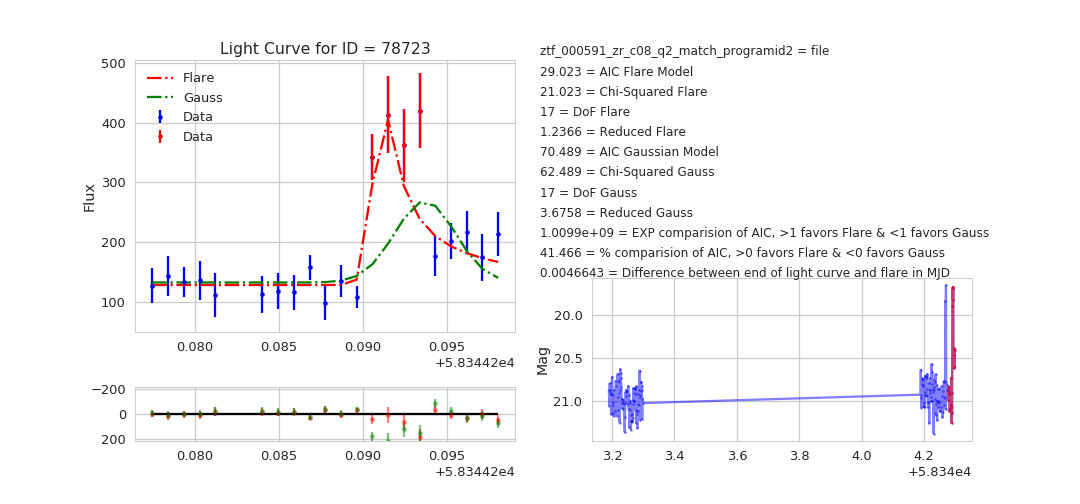

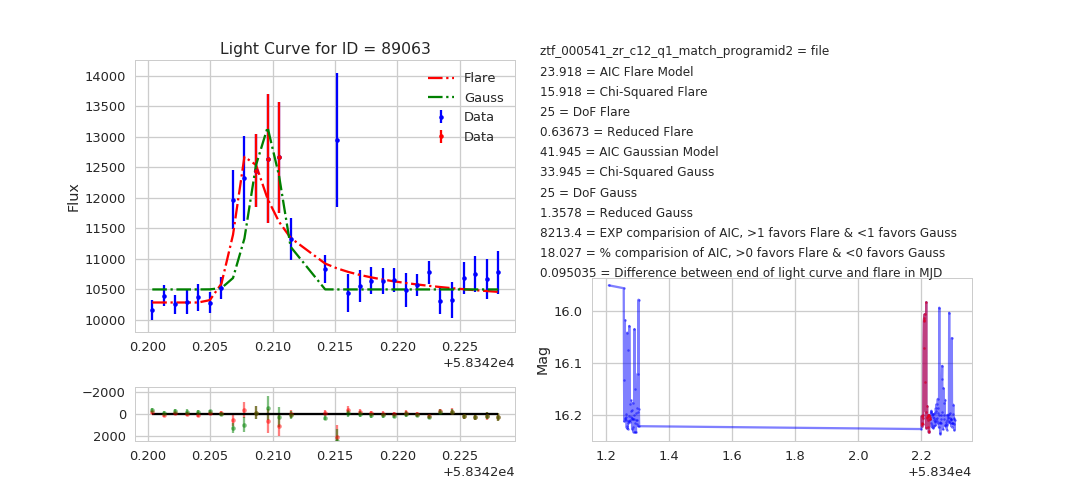

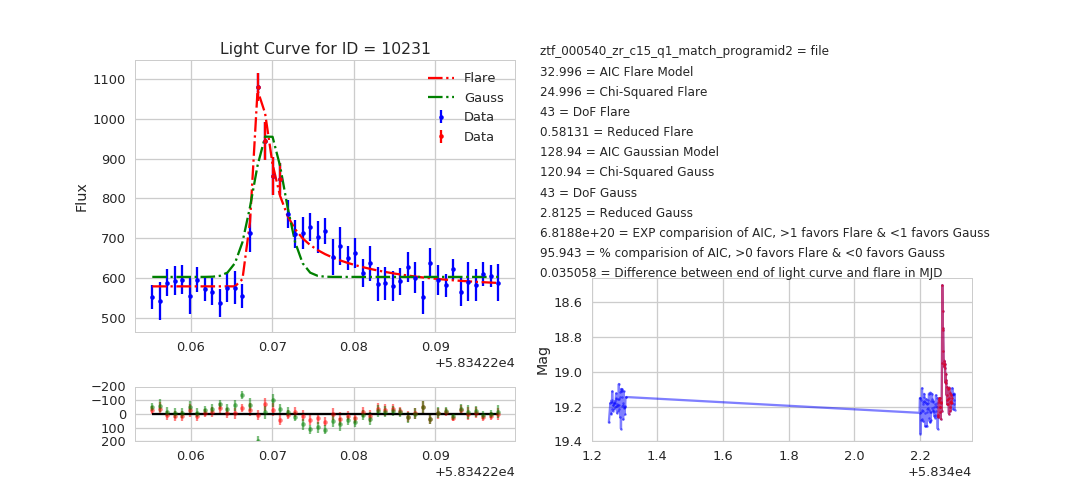

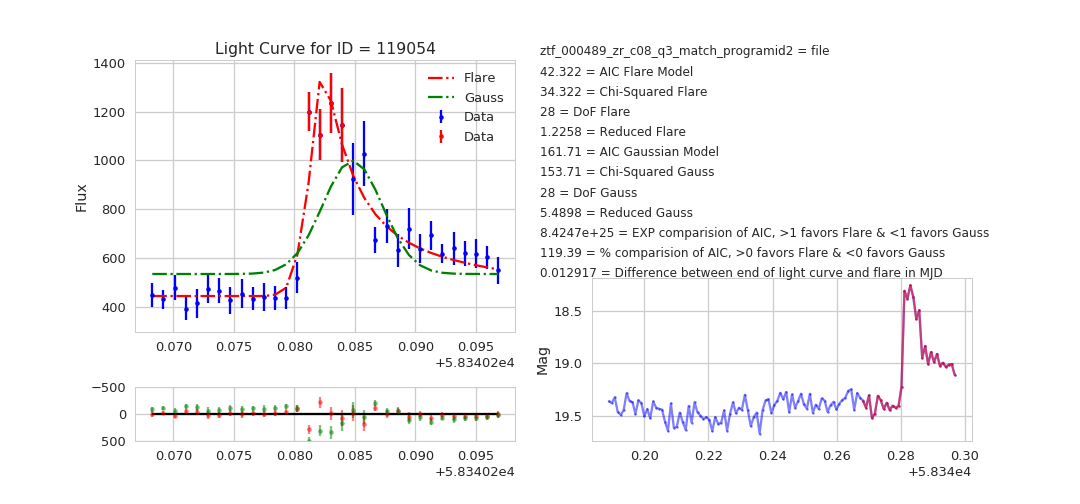

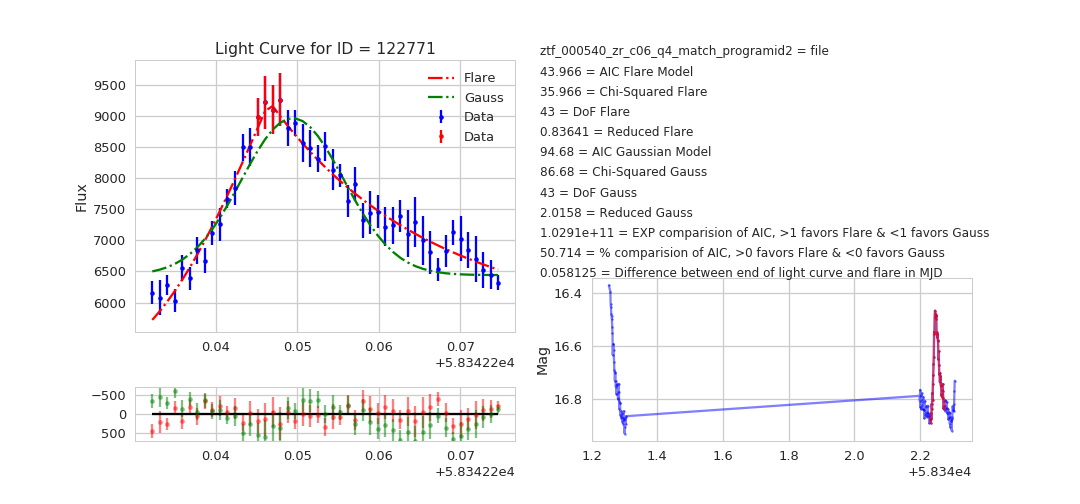

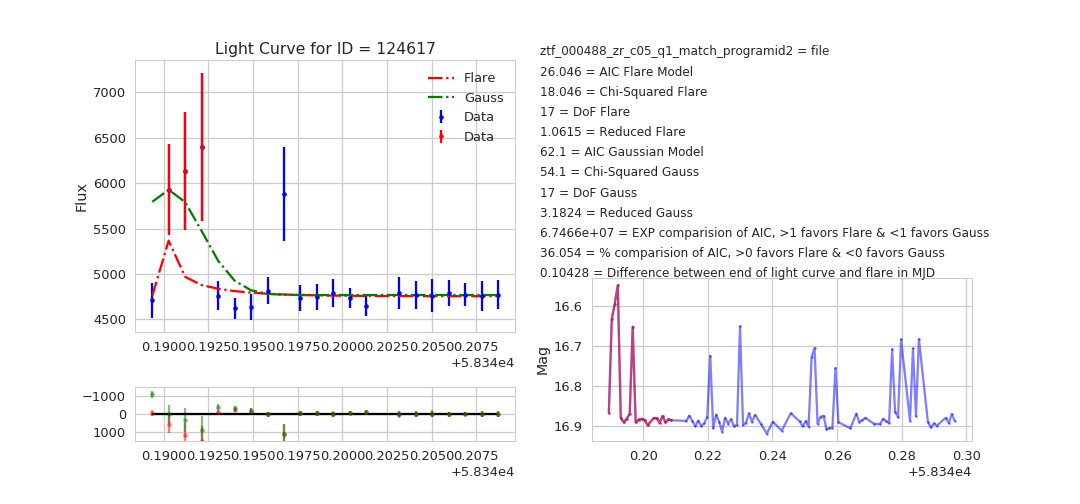

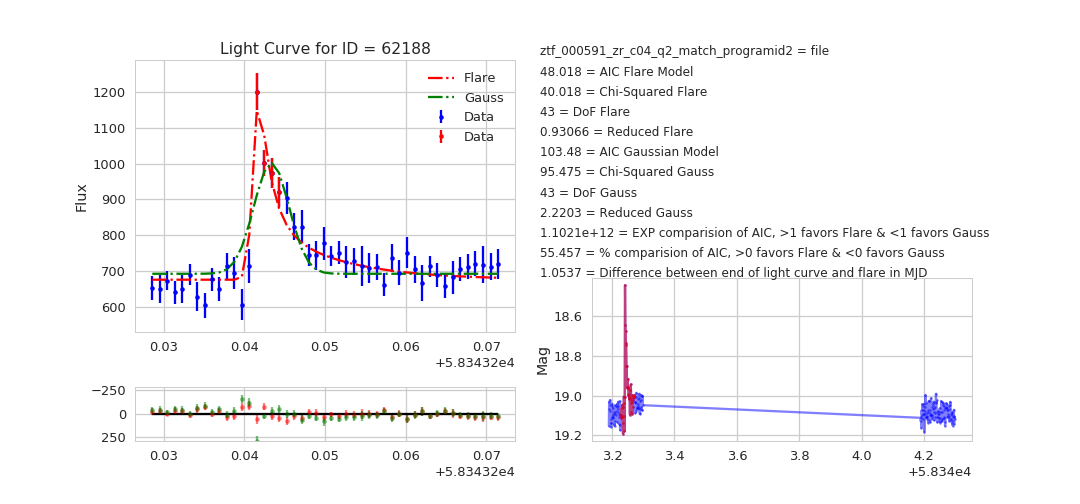

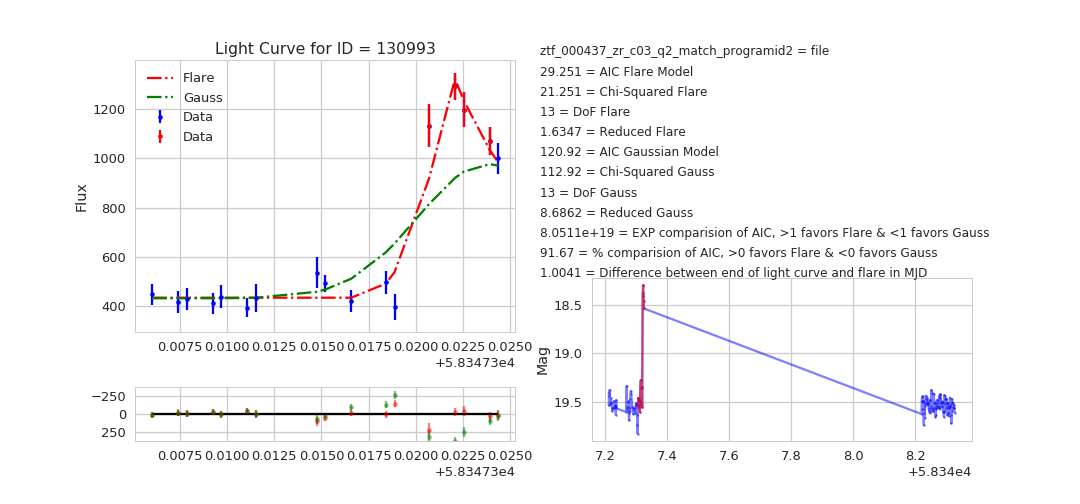

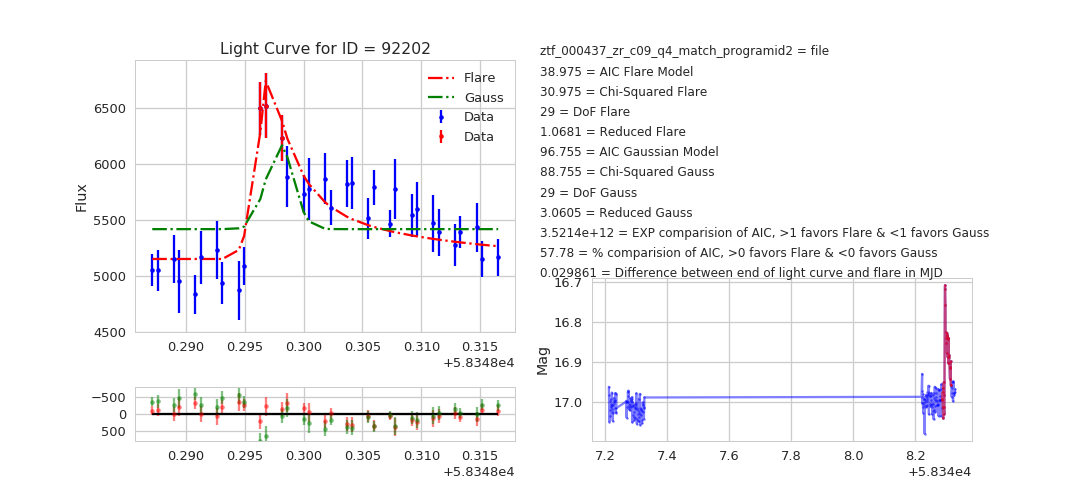

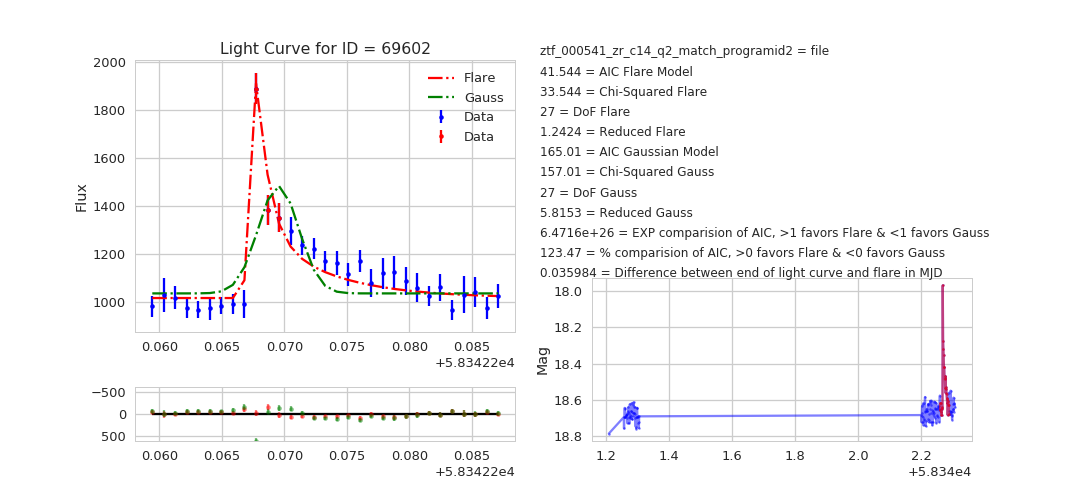

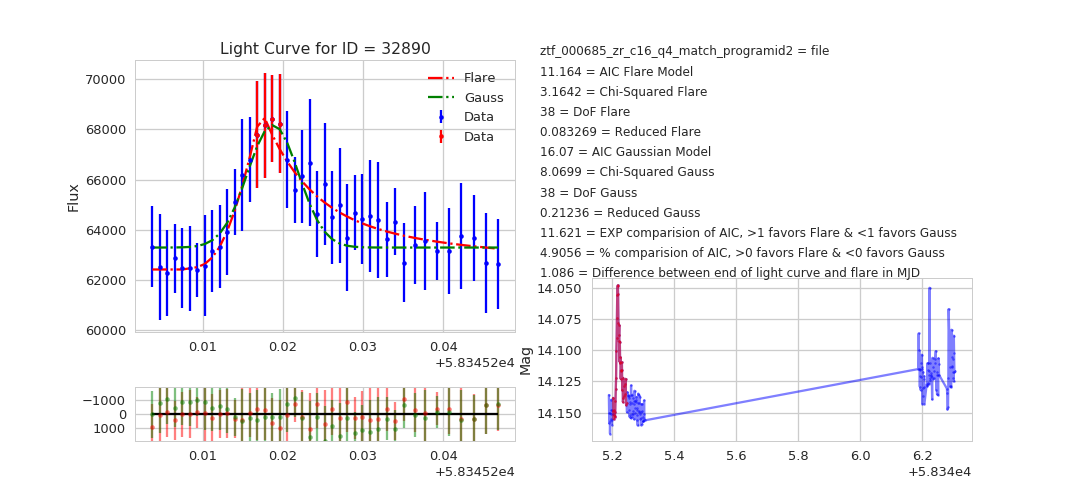

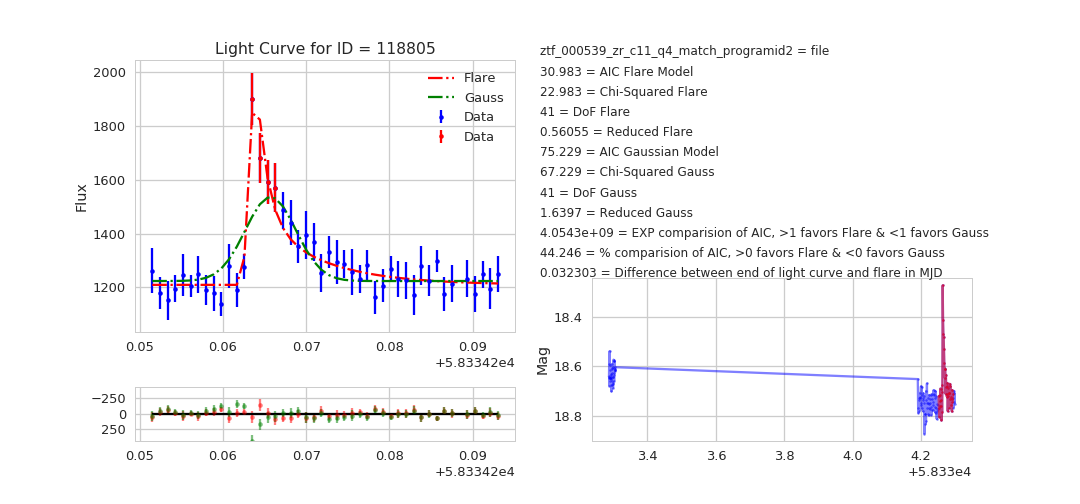

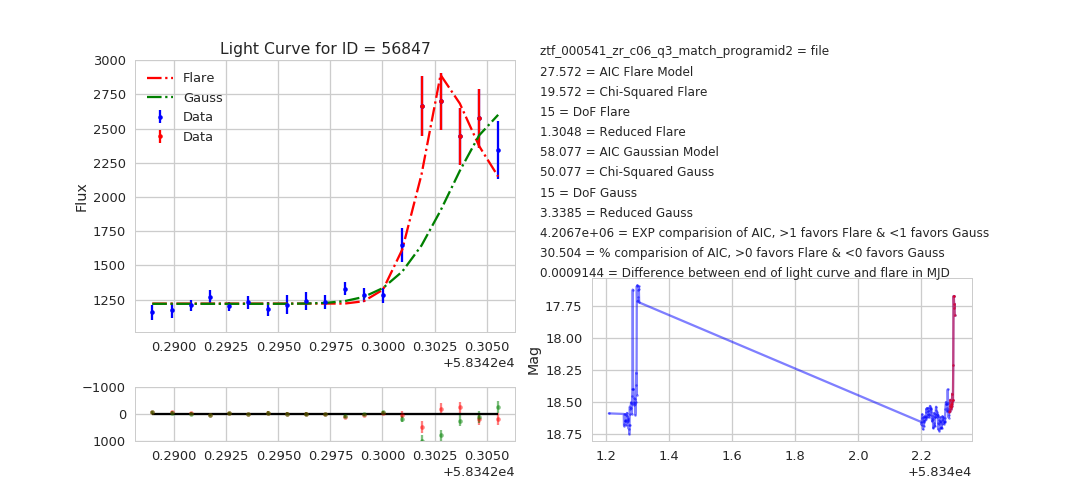

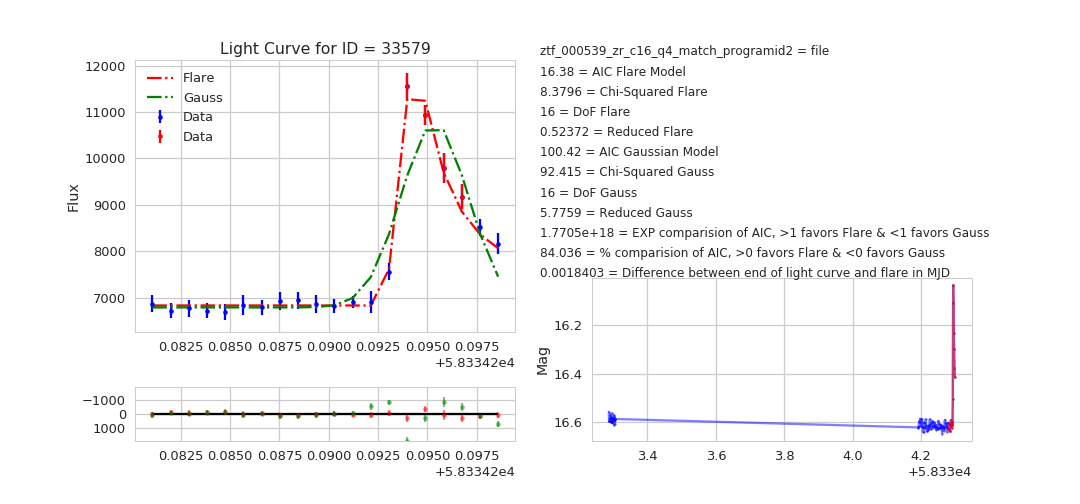

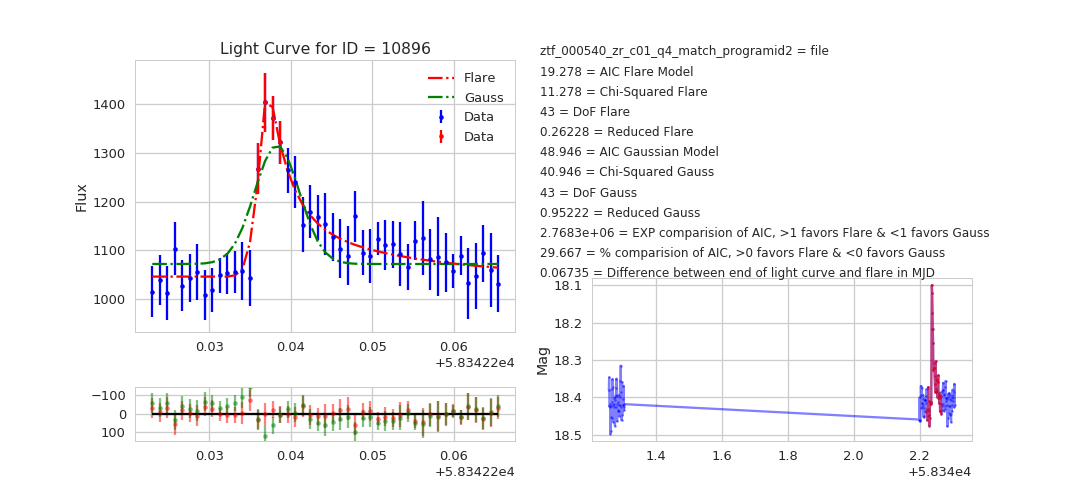

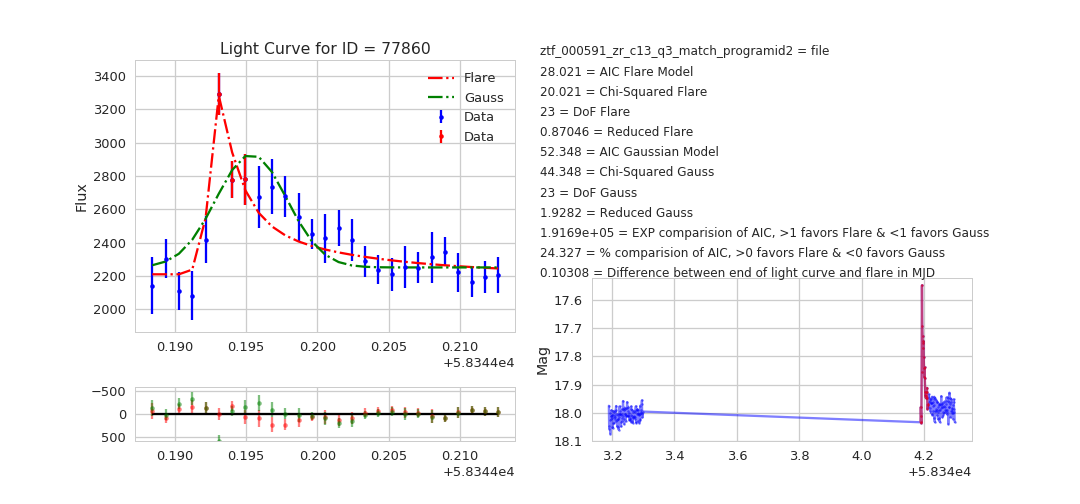

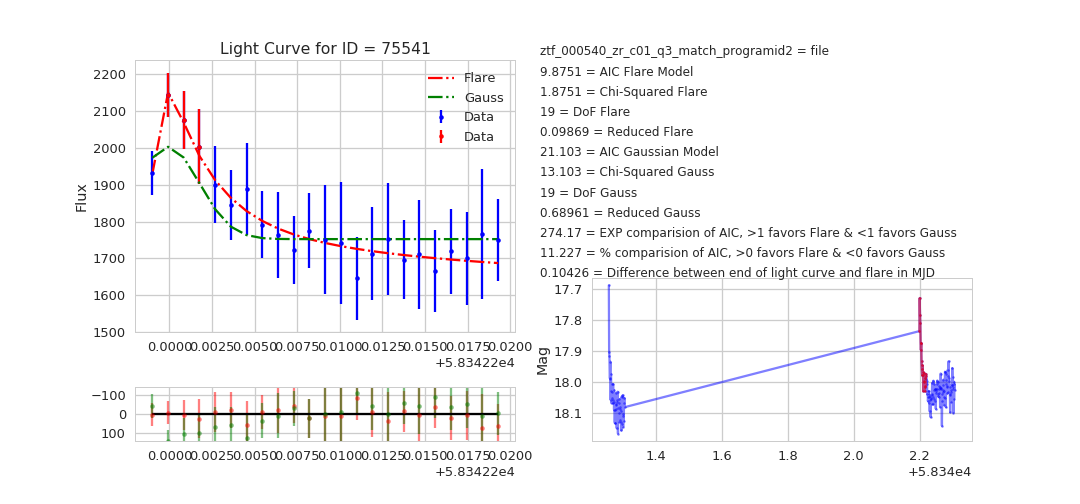

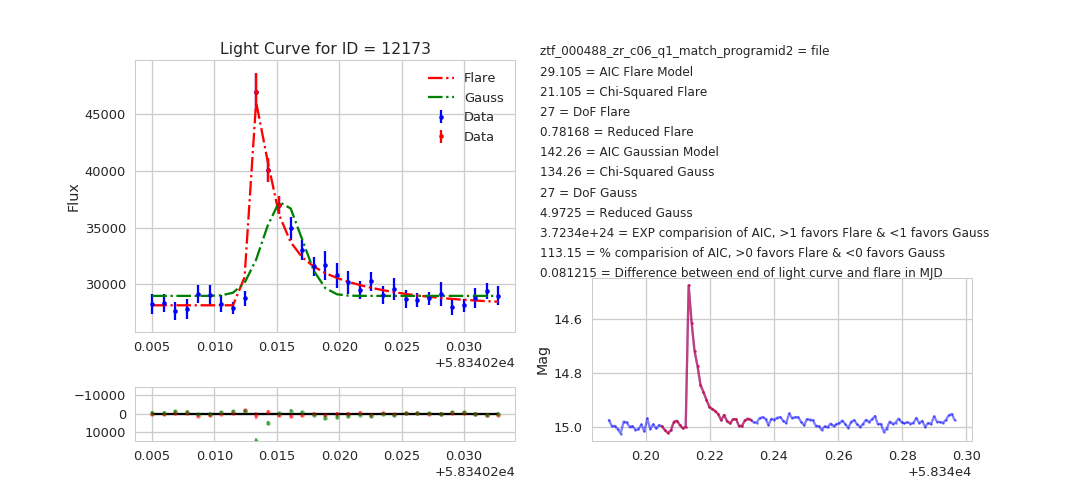

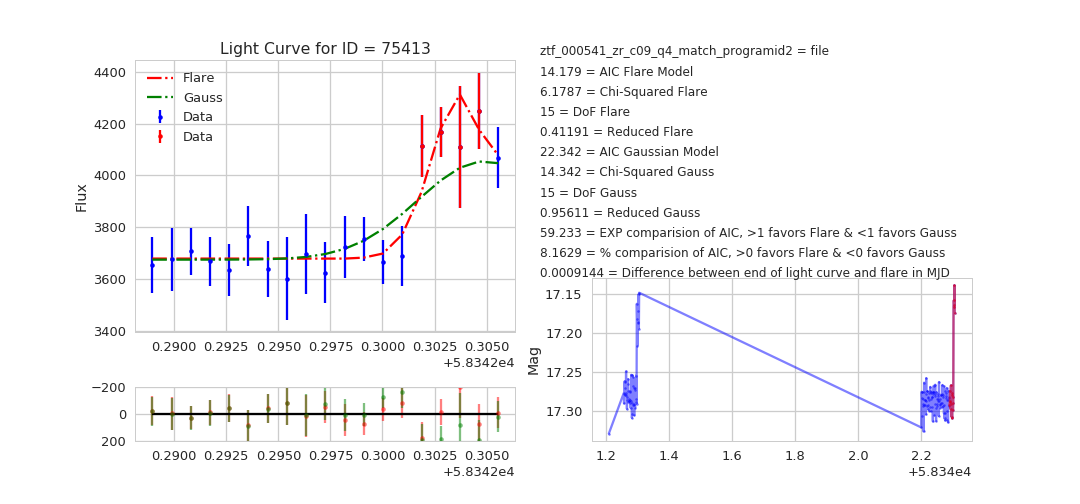

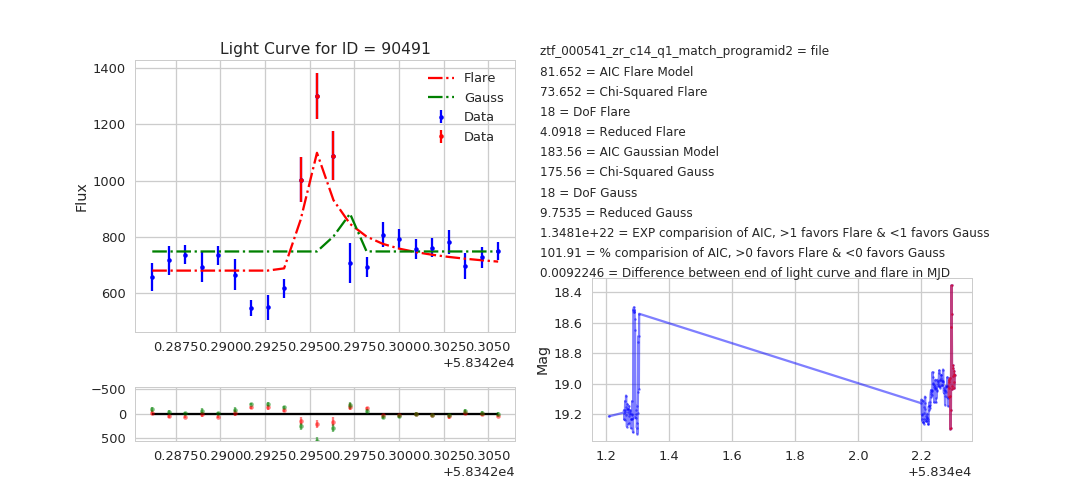

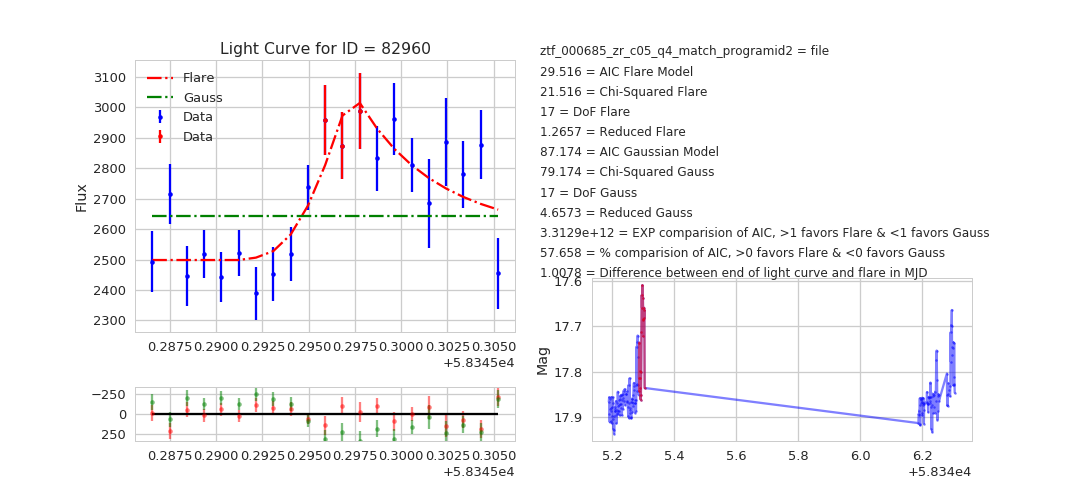

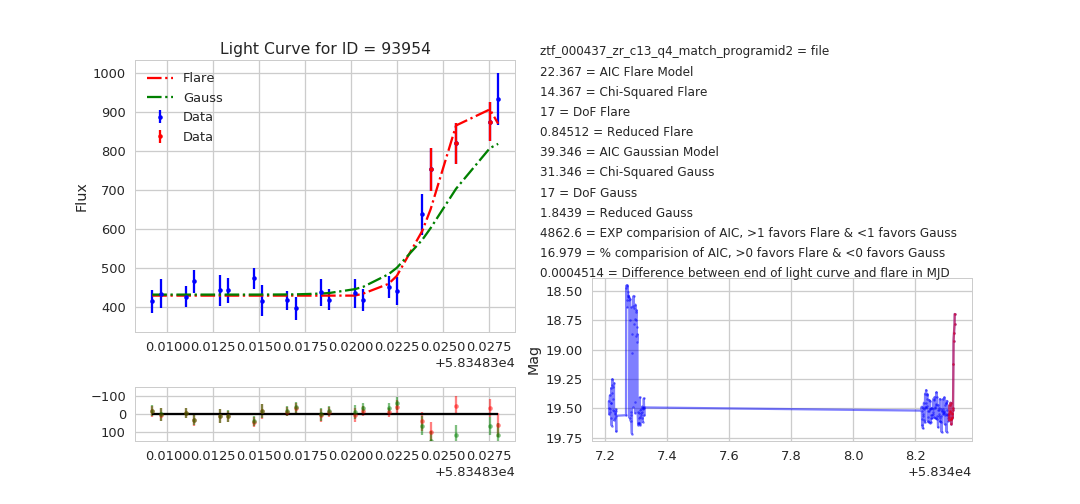

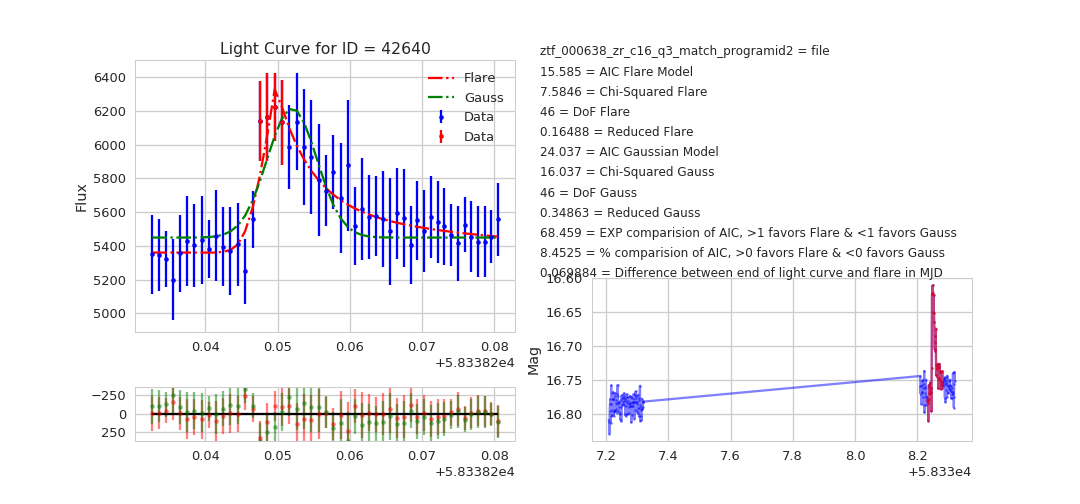

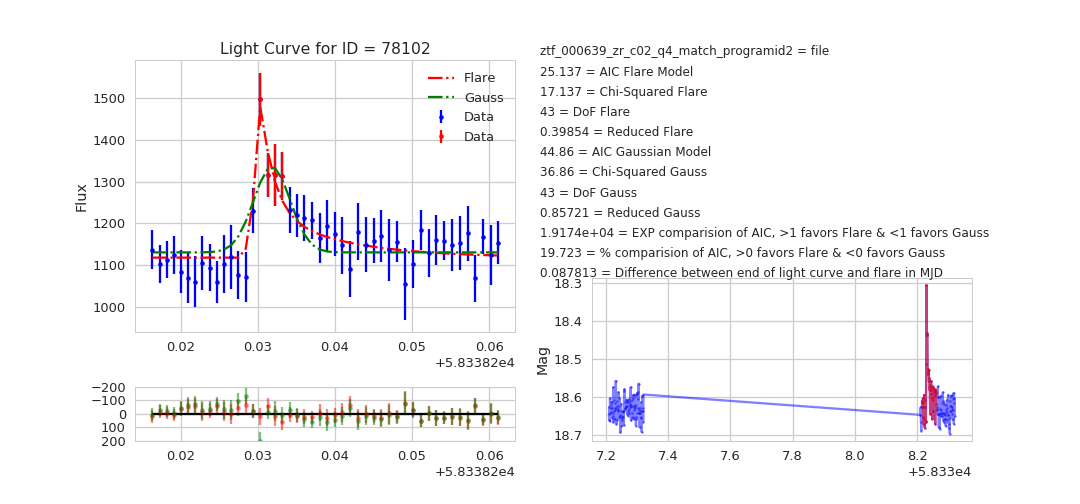

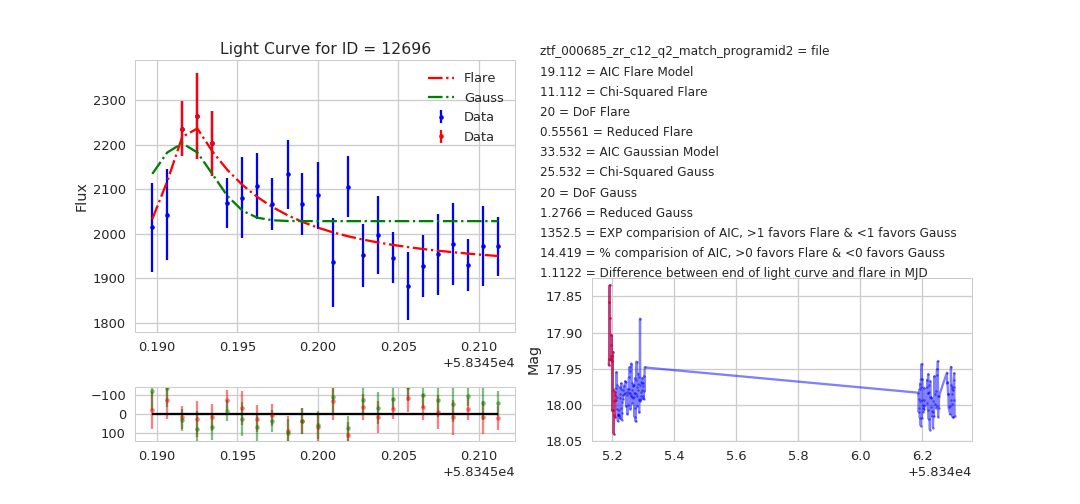

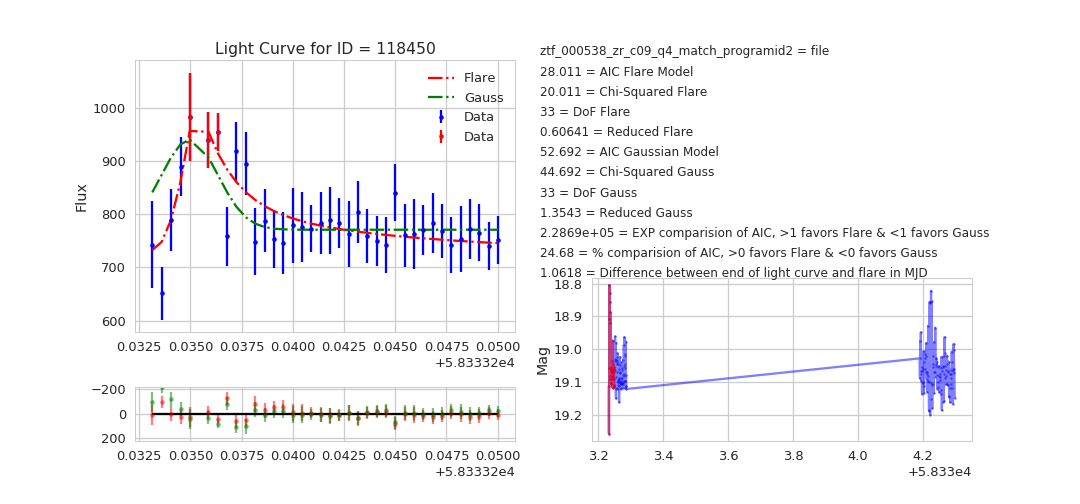

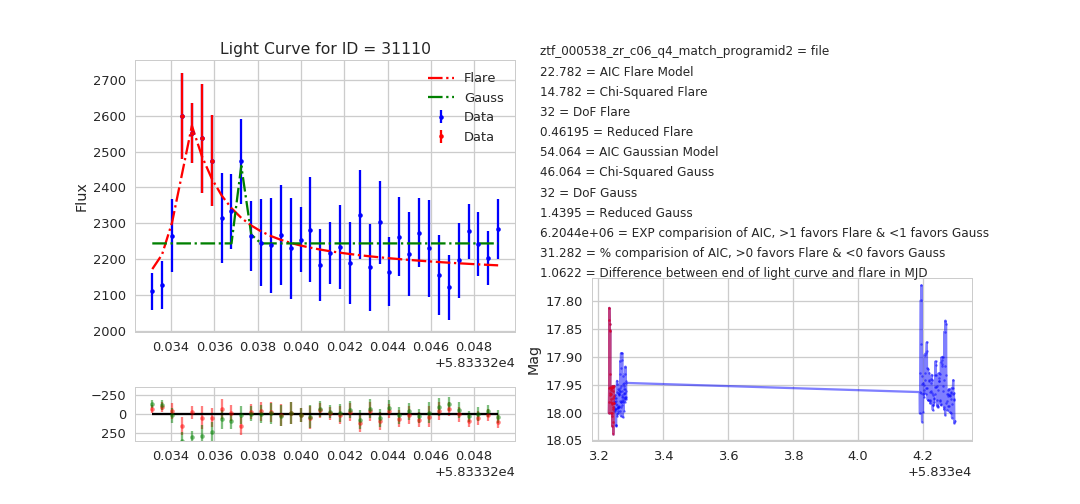

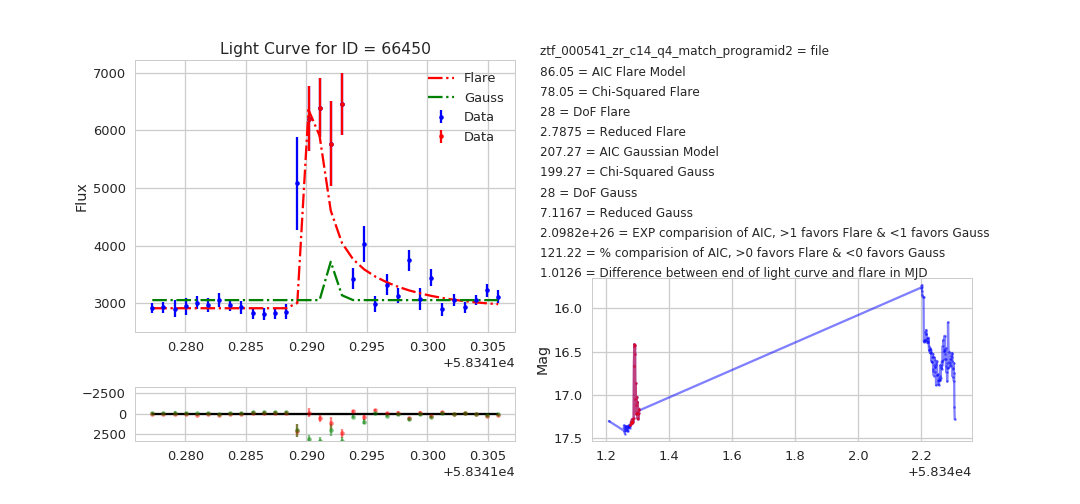

In [104]:
veiwlimitedcurves(flare_energy)

Text(0.5, 0, 'Mr_50')

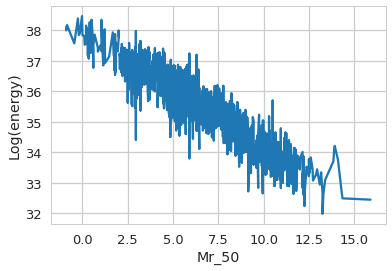

In [405]:
plt.plot(flares_energy['Mr_50'],flares_energy['flare_energy'])
plt.ylabel('Log(energy)')
plt.xlabel('Mr_50')

Text(0.5, 0, 'Mr_50')

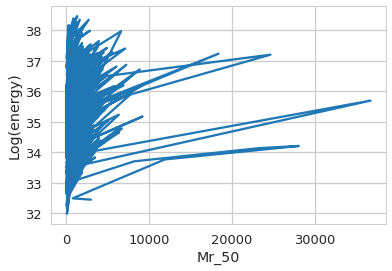

In [406]:
plt.plot(flares_energy['equivdur'],flares_energy['flare_energy'])
plt.ylabel('Log(energy)')
plt.xlabel('Mr_50')

(array([  6.,  31., 323., 278., 162.,  96.,  47.,  10.,   3.,   2.]),
 array([-0.8808241 , -0.49542573, -0.11002736,  0.27537102,  0.66076934,
         1.0461677 ,  1.4315661 ,  1.8169645 ,  2.2023628 ,  2.5877612 ,
         2.9731596 ], dtype=float32),
 <a list of 10 Patch objects>)

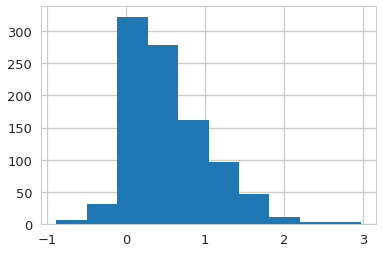

In [100]:
plt.hist(flares_energy.loc[flares_energy['flare_energy'] > 3]['E_50'])

In [101]:
flares_energy.loc[flares_energy['E_50'] <0]

index         matchid        ra_x      dec_x  ztf_n_obs  \
158   12885  10685362048952  291.690868  34.887434        380   
342   13549  11683362097156  293.574926  30.899436        301   
688   15031  10686412107001  296.243208  35.138278        388   
769   14529  10686472125639  295.372690  34.168584        408   
772    8283  10592392006736  305.188382  19.801597        369   
786   12969  10686131134364  294.899880  30.474559        371   
789   13053  11727152023732  294.431776  33.648497        618   
792   15239  11683512144250  295.526472  32.319652        280   
795    3493  10538482111113  281.531200  14.712796        699   
798    2566  10538311046436  275.152463  10.212352        299   
808    2348  10541112074374  298.059183   8.038331        411   
812   13174  11683332080156  294.219091  30.764996        647   
823    5870  10541371008969  299.799185  13.404471        246   
832    8327  10592632013857  300.511321  21.589613        311   
839    9639  11683312054156  288.988073  28.373673        331   
842    9501  11638132005564  306.422584  20.410868        341   
843    7743  10591022118220  298.245239  15.938869        446   
847    8085  10591072028639  297.495285  15.613970        492   
850   12206  10685231024538  292.076971  31.899328        342   
852     860  10437132140968  288.519074  -5.440757        270   
868   12739  11683492117608  294.616142  33.433647        584   
869   15007  10686311032898  295.267722  31.820902        488   
874   13089  10686632063657  294.939339  35.681537        483   
893    6080  10541232033672  299.901262  10.192949        252   
899   12997  10686301062951  294.455716  31.811543        554   
904    2049  10489372081132  295.772032   5.893165        192   
911   12816  10685031115886  293.714688  30.145918        202   
914    9461  10592431040211  302.559827  19.112677        217   
915    8609  10592472121865  301.106699  19.883388        230   
921    8589  10592311091413  301.148689  17.367848        249   
...     ...             ...         ...        ...        ...   
1153   8839  10592132101324  300.459068  16.242391        201   
1154  12507  10685522045505  292.297621  36.713945        415   
1166   8514  10592212076305  303.664219  18.471810        246   
1186   5896  10541332035392  301.368165  12.873342        148   
1209   2806  10538272079296  277.672100  10.446038        270   
1234  14472  11684542030127  299.557030  32.092303        400   
1243   6028  10541332088627  300.915450  13.191376        218   
1246   7257  10592461064425  299.912264  19.131686        813   
1248  15143  10686221036766  298.345403  31.746614        228   
1264   3154  10538312076724  275.190610  10.170116        210   
1271   8867  10592391051480  304.536376  19.450129        363   
1294  13197  11683572032888  290.576018  32.789628        210   
1313  12606  10685322000910  294.546986  35.090500        474   
1315   9009  10592012007191  305.944066  16.813203        252   
1326   8418  10593303010716  306.961604  17.710455        475   
1337   8893  10592442058401  300.726674  20.623431        280   
1340   8971  10592471070005  300.519340  19.631328        261   
1358  13091  10685241044322  289.903016  32.610112        334   
1359   5398  10591111109890  295.980138  15.384712        413   
1360  12272  10686611075263  293.922975  36.287622        691   
1367   8693  10592291064588  300.414876  18.095111        292   
1372  14434  10686072128708  299.655104  30.264325        234   
1377  14680  10686542138450  298.770626  36.172676        452   
1386  15083  10686122095584  295.063039  31.298081        224   
1401  14490  10686332013074  301.143388  34.899662        232   
1408  12941  10685062010946  290.559829  30.316712        206   
1418  12647  10685212049590  290.973410  32.910059        266   
1421   3758  10539012011026  287.489224   9.466742        415   
1423   1759  10487351011397  284.543642   5.049756        372   
1424   2535  10538102016249  276.841841  

In [99]:
def field(df):
    f436 = df.loc[(df['unique_matchids_exploded'] > 10436000000000) & (df['unique_matchids_exploded'] < 10437000000000)]
    f437 = df.loc[(df['unique_matchids_exploded'] > 10437000000000) & (df['unique_matchids_exploded'] < 10438000000000)]
    f488 = df.loc[(df['unique_matchids_exploded'] > 10488000000000) & (df['unique_matchids_exploded'] < 10489000000000)]
    f489 = df.loc[(df['unique_matchids_exploded'] > 10489000000000) & (df['unique_matchids_exploded'] < 10490000000000)]
    f538 = df.loc[(df['unique_matchids_exploded'] > 10538000000000) & (df['unique_matchids_exploded'] < 10539000000000)]
    f539 = df.loc[(df['unique_matchids_exploded'] > 10539000000000) & (df['unique_matchids_exploded'] < 10540000000000)]
    f540 = df.loc[(df['unique_matchids_exploded'] > 10540000000000) & (df['unique_matchids_exploded'] < 10541000000000)]
    f541 = df.loc[(df['unique_matchids_exploded'] > 10541000000000) & (df['unique_matchids_exploded'] < 10542000000000)]
    f591 = df.loc[(df['unique_matchids_exploded'] > 10591000000000) & (df['unique_matchids_exploded'] < 10592000000000)]
    f592 = df.loc[(df['unique_matchids_exploded'] > 10592000000000) & (df['unique_matchids_exploded'] < 10593000000000)]
    f638 = df.loc[(df['unique_matchids_exploded'] > 10638000000000) & (df['unique_matchids_exploded'] < 10639000000000)]
    f639 = df.loc[(df['unique_matchids_exploded'] > 10639000000000) & (df['unique_matchids_exploded'] < 10640000000000)]
    f685 = df.loc[(df['unique_matchids_exploded'] > 10685000000000) & (df['unique_matchids_exploded'] < 10686000000000)]
    f686 = df.loc[(df['unique_matchids_exploded'] > 10686000000000) & (df['unique_matchids_exploded'] < 10687000000000)]
    return f436, f437, f488, f489, f538, f539, f540, f541, f591, f592, f638, f639, f685, f686


In [103]:
f436, f437, f488, f489, f538, f539, f540, f541, f591, f592, f638, f639, f685, f686 = field(flare_lim)
fall436, fall437, fall488, fall489, fall538, fall539, fall540, fall541, fall591, fall592, fall638, fall639, fall685, fall686 = field(green_gaia)

ratef436 = np.arange(1, len(f436) +1) /  np.sum(fall436['ztf_n_obs'])*30
ratef437 = np.arange(1, len(f437) +1) /  np.sum(fall437['ztf_n_obs'])*30
ratef488 = np.arange(1, len(f488) +1) /  np.sum(fall488['ztf_n_obs'])*30
ratef489 = np.arange(1, len(f489) +1) /  np.sum(fall489['ztf_n_obs'])*30
ratef538 = np.arange(1, len(f538) +1) /  np.sum(fall538['ztf_n_obs'])*30
ratef539 = np.arange(1, len(f539) +1) /  np.sum(fall539['ztf_n_obs'])*30
ratef540 = np.arange(1, len(f540) +1) /  np.sum(fall540['ztf_n_obs'])*30
ratef541 = np.arange(1, len(f541) +1) /  np.sum(fall541['ztf_n_obs'])*30
ratef591 = np.arange(1, len(f591) +1) /  np.sum(fall591['ztf_n_obs'])*30
ratef592 = np.arange(1, len(f592) +1) /  np.sum(fall592['ztf_n_obs'])*30
ratef638 = np.arange(1, len(f638) +1) /  np.sum(fall638['ztf_n_obs'])*30
ratef639 = np.arange(1, len(f639) +1) /  np.sum(fall639['ztf_n_obs'])*30
ratef685 = np.arange(1, len(f685) +1) /  np.sum(fall685['ztf_n_obs'])*30
ratef686 = np.arange(1, len(f686) +1) /  np.sum(fall686['ztf_n_obs'])*30

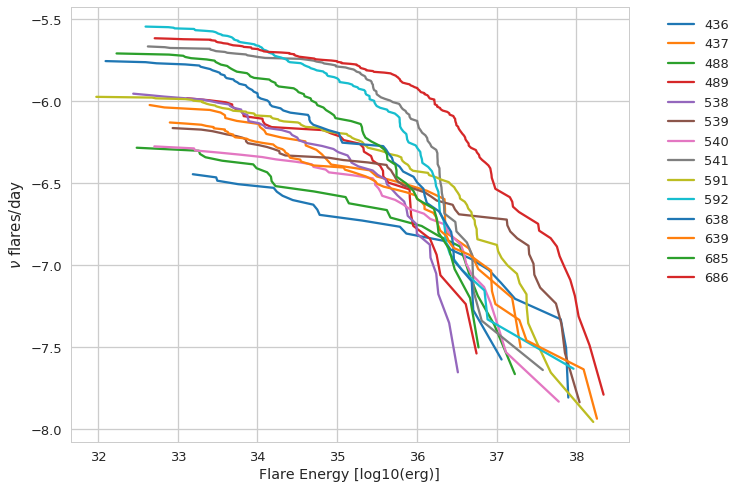

In [104]:
plt.figure(figsize=(10,8))
plt.ylabel('$\\nu$ flares/day', size=15)
plt.xlabel('Flare Energy [log10(erg)]')
plt.plot(f436['flare_energy'],np.log10(ratef436), label="436")
plt.plot(f437['flare_energy'],np.log10(ratef437), label="437")
plt.plot(f488['flare_energy'],np.log10(ratef488), label="488")
plt.plot(f489['flare_energy'],np.log10(ratef489), label="489")
plt.plot(f538['flare_energy'],np.log10(ratef538), label="538")
plt.plot(f539['flare_energy'],np.log10(ratef539), label="539")
plt.plot(f540['flare_energy'],np.log10(ratef540), label="540")
plt.plot(f541['flare_energy'],np.log10(ratef541), label="541")
plt.plot(f591['flare_energy'],np.log10(ratef591), label="591")
plt.plot(f592['flare_energy'],np.log10(ratef592), label="592")
plt.plot(f638['flare_energy'],np.log10(ratef638), label="638")
plt.plot(f639['flare_energy'],np.log10(ratef639), label="639")
plt.plot(f685['flare_energy'],np.log10(ratef685), label="685")
plt.plot(f686['flare_energy'],np.log10(ratef686), label="686")

plt.legend(bbox_to_anchor = (1.2, 1.0))

In [249]:
def Bins(df,column='Mr_50',n_bins=5): 
    df_sort = df.sort_values(by=[column],ascending=True)
    df_sort = df_sort.reset_index()
    bins = [df_sort[column].values[0]]
    len_df = len(df_sort)
    for i in np.arange(n_bins)+1:
        bin_edge = df_sort[column].values[int(len_df / n_bins * i - 1)]
        bins = np.append(bins, bin_edge)
    return bins

In [359]:
def ffdiagram_binned(df_flare, df_all, bins=None, n_bins=5, bin_column='Mr_50', legendlabel='Mr'):
    
    #use bin function to get equal bins of flares
    if np.all(bins)==None:
        bins_flare = Bins(df_flare, column=bin_column, n_bins=n_bins)
    else:
        bins_flare = bins
    
    #make bins for all sources, 
    #dont want to miss max and min values outside of flare bins
    bins_all = [df_all[bin_column].min()]
    bins_all = np.append(bins_all, bins_flare[1:-1])
    bins_all = np.append(bins_all, df_all[bin_column].max())
    
    #set up plots
    plt.figure(figsize=(7,7))
    plt.ylabel('log10($\\nu$ flares/day)', size=15)
    plt.xlabel('Flare Energy [log10(erg)]')
    
    #play with colors of plots, pick color based on bins
    colormap = cm.viridis
    normalize = mcolors.Normalize(vmin=0, vmax=n_bins)

    
    for i in range(n_bins):
        flare_inbin = df_flare.loc[(df_flare[bin_column] >= bins_flare[i]) & (df_flare[bin_column] < bins_flare[i+1])]
        all_inbin = df_all.loc[(df_all[bin_column] >= bins_all[i]) & (df_all[bin_column] < bins_all[i+1])]
        flare_energy = flare_inbin.sort_values(by=['flare_energy'],ascending=False)
        rate = np.arange(1, len(flare_inbin) +1) / (np.sum(all_inbin['ztf_n_obs']*30))
        color = colormap(normalize(i))
        plt.plot(flare_energy['flare_energy'], np.log10(rate), color=color, 
                 label='{} {:.1f} : {:.1f}'.format(legendlabel,bins_all[i],bins_all[i+1]))
    plt.legend(loc='upper right', borderaxespad=0.)


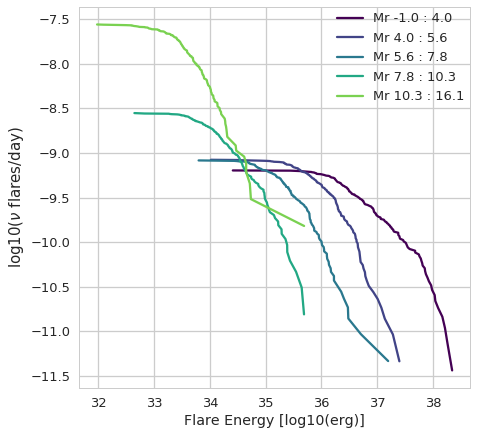

In [360]:
ffdiagram_binned(flare_lim,green_gaia)

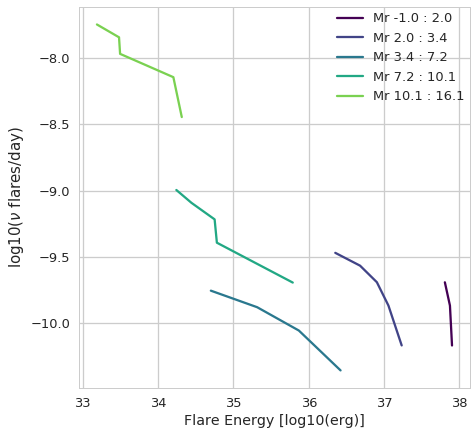

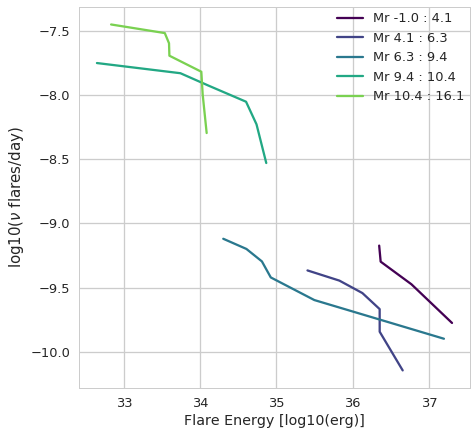

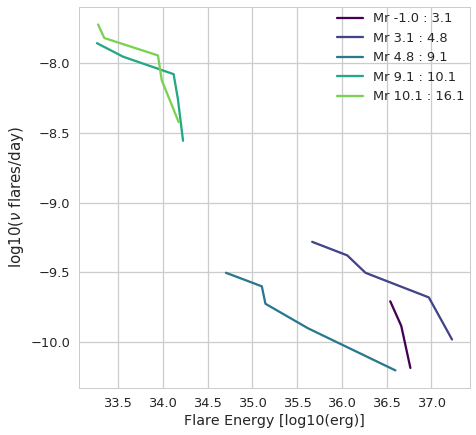

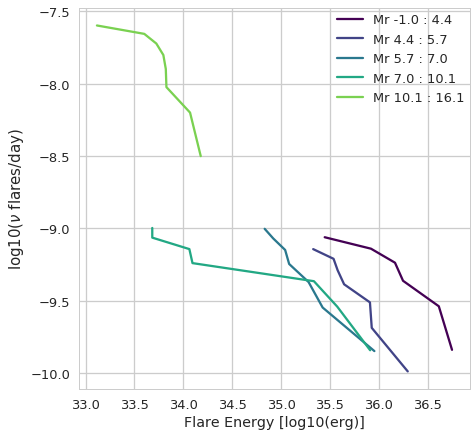

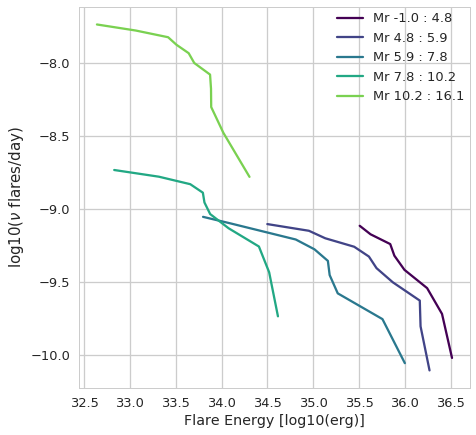

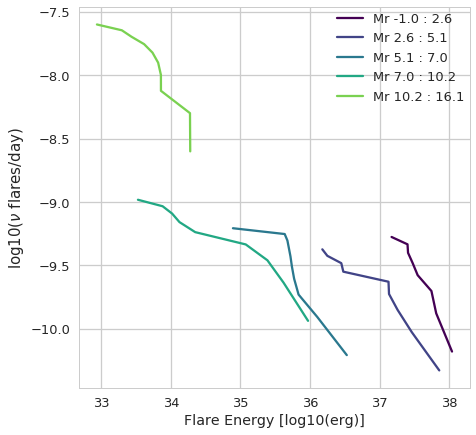

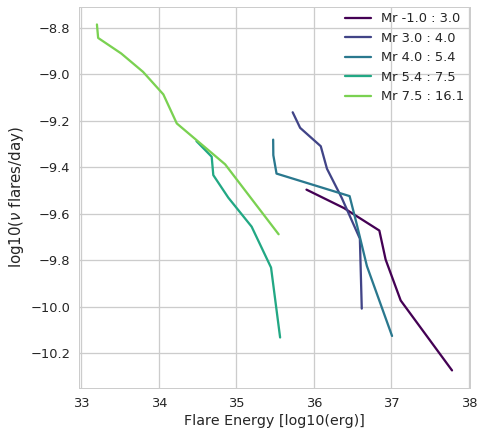

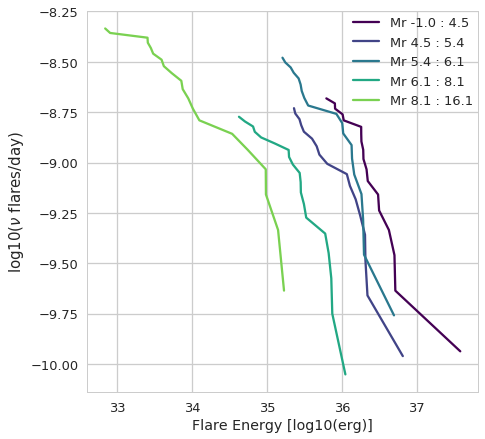

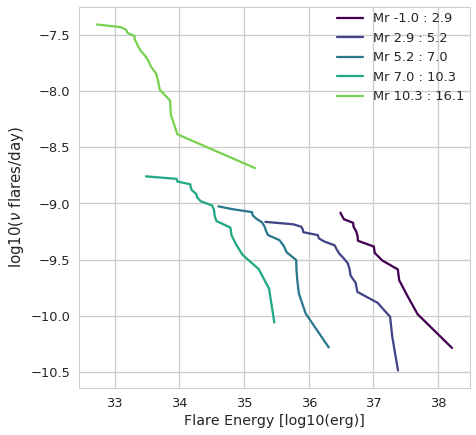

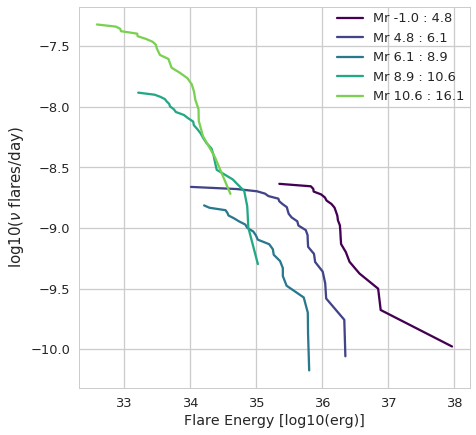

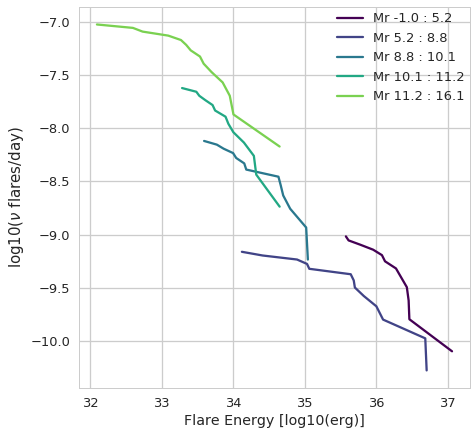

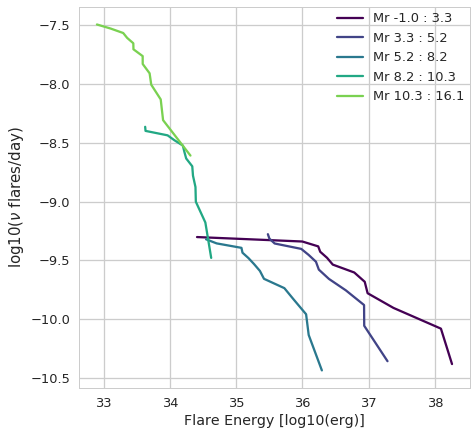

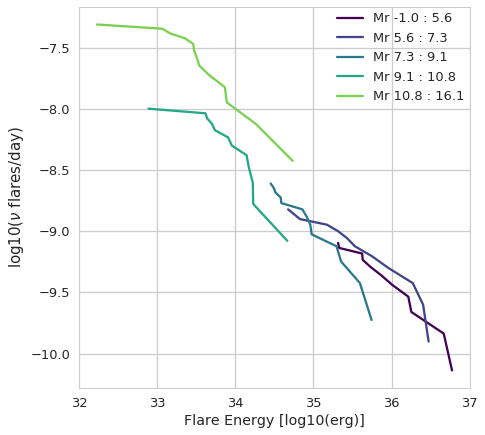

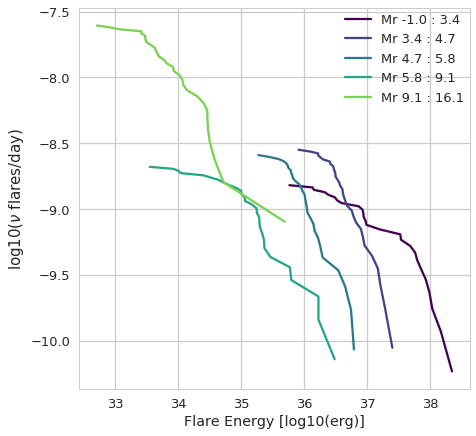

In [326]:
ffdiagram_binned(f436,fall436)
ffdiagram_binned(f437,fall437)
ffdiagram_binned(f488,fall488)
ffdiagram_binned(f489,fall489)
ffdiagram_binned(f538,fall538)
ffdiagram_binned(f539,fall539)
ffdiagram_binned(f540,fall540)
ffdiagram_binned(f541,fall541)
ffdiagram_binned(f591,fall591)
ffdiagram_binned(f592,fall592)
ffdiagram_binned(f638,fall638)
ffdiagram_binned(f639,fall639)
ffdiagram_binned(f685,fall685)
ffdiagram_binned(f686,fall686)

(array([26252266., 21063497., 22883886., 20471948.,  2674924.]),
 array([-0.9  ,  3.85 ,  5.3  ,  6.925,  9.6  , 15.9  ], dtype=float32),
 <a list of 5 Patch objects>)

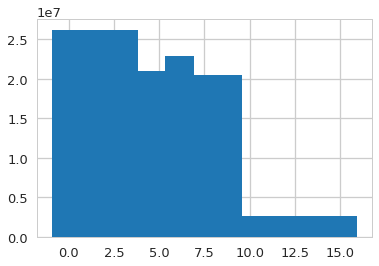

In [86]:
plt.hist(green_ids['Mr_50'],  bins=bins_Mr)


### Converting to Galactic Coordinates

The galactic coordinates are $(l,b)$. $l$ is the angle clockwise away from the galactic center. $b$ is the angle away from the galactic plan. Using angle $b$ and the distant modulus, I used sin($b$) = height about the galactiv plane / distant modulus or: height = $dm$sin($b$)

In [339]:
def galactic_centric_coords(df):
    dist_pc = 10 ** ((df['dm_50'] +5) / 5)

    c = coord.ICRS(ra=df['ra_x'].values*u.degree, 
                   dec=df['dec_x'].values*u.degree, 
                   distance=dist_pc.values*u.pc)
    galactic = c.transform_to(coord.Galactocentric)     
    print(galactic)
    df['gal_x'] = galactic.x.value
    df['gal_y'] = galactic.y.value
    df['gal_z'] = galactic.z.value
    df['abs_gal_z'] = abs(galactic.z.value)
    df['gal_r'] = (galactic.x.value**2 + galactic.y.value**2)**.5
    
    
    return df

In [333]:
galcoordflare = galactic_centric_coords(flare_lim)

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, 232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in pc
    [(-6912.25863225, 2.32803409e+03,  6.31622752e+01),
     (-6526.98219111, 5.06763240e+03,  2.05293074e+02),
     (-6757.70404827, 2.09954749e+03,  7.63770887e+00),
     (-4384.72807835, 3.97247183e+03,  1.06753369e+02),
     (-6121.56050468, 5.41263735e+03,  2.87096662e+02),
     (-3481.63063269, 4.58429926e+03,  1.80492588e+02),
     (-4095.83751882, 5.72690683e+03, -2.50171052e+01),
     (-5366.09889714, 5.38936282e+03,  6.49166430e+01),
     (-5936.25179287, 5.64501490e+03,  5.47572967e+00),
     (-1633.44712466, 7.08828042e+03,  6.89244165e+02),
     (-2497.75203887, 6.44444754e+03,  2.53243154e+02),
     (  -76.92320998, 1.28087118e+04,  1.69604975e+03),
     (-2082.82061969, 6.69764255e+03,  2.73098910e+02),
     (-1786.82095949, 9.28751030e+03, -3.47342209e+02)

In [334]:
galcoordflare

level_0  index         matchid      ra_x_x    dec_x_x  ztf_n_obs  \
0          0   9479  10639042143119  294.729679  23.624203        195   
1          1  11718  10686392146896  300.342549  34.102343        246   
2          2   6571  10591292031798  292.961259  18.243274        371   
3          3   3515  10539162147399  287.766743  11.533991        184   
4          4  12465  10686271116653  298.035956  32.190951        503   
5          5   3257  10539232168940  286.445876  10.133943        335   
6          6   6742  10591292030963  292.964242  18.261474        491   
7          7   9861  10639161044369  296.345063  25.357497        417   
8          8  12547  10686072158470  300.294007  30.073229        320   
9          9   3337  10539542140258  285.599338  14.137702        403   
10        10   3338  10539512026371  288.386084  14.137244        864   
11        11   8913  10638182087652  288.446316  24.562815        369   
12        12   3190  10539321059222  287.925515  13.388459        331   
13        13   6418  10591251078688  294.956210  18.624383        474   
14        14   3725  10540082174480  291.603437   9.128622        215   
15        15   9605  10639032115132  296.405902  22.711553        333   
16        16  11642  10687301036778  301.812053  32.269855        466   
17        17    307  10488102147257  287.009217   0.912303        615   
18        18    160  10436082185401  283.508388  -4.673342        166   
19        19  12023  10686202034461  300.373506  32.629705        442   
20        20   1489  10488491101111  290.397592   7.516340        302   
21        21   5858  10591262097889  295.008294  17.816029        280   
22        22  12222  10686232147520  300.257791  31.678193        290   
23        23   6739  10591292030993  292.962491  18.260559        520   
24        24   5636  10591402152958  295.139526  20.116526        417   
25        25  12081  10686062088730  298.429340  30.316627        303   
26        26   6428  10591422151035  294.275913  19.307780        356   
27        27   4129  10540012146549  293.871599   8.934379        317   
28        28  11748  11684342080761  301.754751  30.225432        456   
29        29   4148  10540492138160  294.541713  14.735145        311   
..       ...    ...             ...         ...        ...        ...   
878      878  10303  10685561026721  289.506085  36.291985        376   
879      879   2559  10538581032637  276.322480  14.516137        338   
880      880   8747  10638242027203  285.105004  25.516096        300   
881      881   8506  10639452112765  289.703578  27.128049        504   
882      882    862  10437171069741  293.817513  -3.111016        226   
883      883   2036  10489082116015  294.594261   1.747394        200   
884      884  11959  10686332013074  301.143388  34.899662        232   
885      885   7644  11638142056754  305.923634  19.451616        355   
886      886   6509  10591592019160  295.873374  21.404709        327   
887      887   7614  10592102072893  301.864376  16.004639        293   
888      888  11571  10686362008031  300.121430  34.999010        209   
889      889   5965  10640102083238  299.366106  22.516924        428   
890      890   8583  10638252055041  283.787966  26.006203        356   
891      891  10707  10685062010946  290.559829  30.316712        206   
892      892  10514  10685061024796  290.819485  30.018584        276   
893      893   8645  10637352050550  282.306352  26.585825        357   
894      894   8357  10638372008030  286.679467  27.826653        352   
895      895   3412  10539422134675  283.671637  12.568377        219   
896      896   6329  10639021017863  295.898853  22.451008        706   
897      897   5622  10591582006185  294.524737  21.591897        426   
898      898   6653  10591591006555  296.000378  21.521505        512   
899      899   7044  10592561017229  302.913591  22.379661        312   
900      900   4567  10541522059283  300.644975  14.942400     

In [340]:
all_gal = galactic_centric_coords(green_gaia)

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, 232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in pc
    [(-2771.62848324, 3252.66054065, 142.54741016),
     (-6300.66576286, 1176.1182818 ,  68.67790588),
     (-3520.76523737, 2812.77760229, 127.16724096), ...,
     (-6138.57597258, 6807.51186443,  89.02590247),
     (-7343.86875457, 3011.63180309,  54.4715658 ),
     (-7526.14672991, 2437.48056677,  49.19882298)]>


TypeError: text() missing 1 required positional argument: 's'

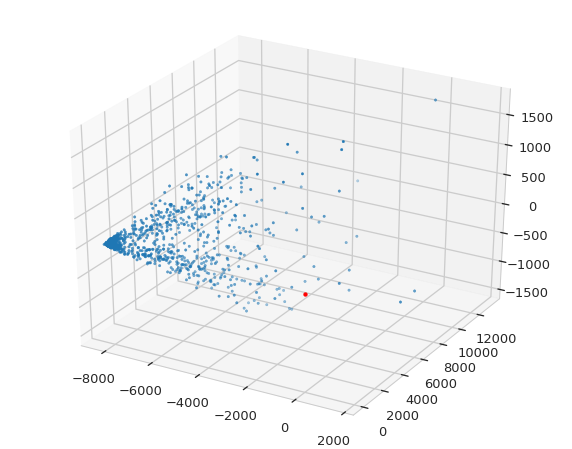

In [212]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection='3d')


ax.scatter(galcoordflare['gal_x'], galcoordflare['gal_y'], galcoordflare['gal_z'], s=6)
ax.scatter(0,0,0, s=15, c='red', label='Galactic Center')
ax.text(0, 0, 0 'Galactic Center')

ax.set_xlabel('X PC')
ax.set_ylabel('Y PC')
ax.set_zlabel('Z PC')

plt.show()

In [336]:
zbins = Bins(galcoordflare,column='abs_gal_z',n_bins=3)
zbins

array([3.59741242e-02, 7.36080531e+01, 3.00772050e+02, 1.69604975e+03])

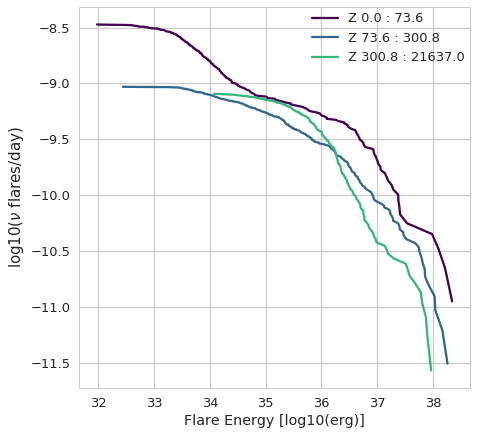

In [337]:
ffdiagram_binned(galcoordflare, all_gal, n_bins=3, bin_column='abs_gal_z', legendlabel='Z')

In [343]:

height1_flare = galcoordflare.loc[(galcoordflare['abs_gal_z'].values > zbins[0]) & (galcoordflare['abs_gal_z'].values < zbins[1])]
height2_flare = galcoordflare.loc[(galcoordflare['abs_gal_z'].values > zbins[1]) & (galcoordflare['abs_gal_z'].values < zbins[2])]
height3_flare = galcoordflare.loc[(galcoordflare['abs_gal_z'].values > zbins[2]) & (galcoordflare['abs_gal_z'].values < zbins[3])]

height1_all = all_gal.loc[(all_gal['abs_gal_z'].values < zbins[1])]
height2_all = all_gal.loc[(all_gal['abs_gal_z'].values > zbins[1]) & (all_gal['abs_gal_z'].values < zbins[2])]
height3_all = all_gal.loc[(all_gal['abs_gal_z'].values > zbins[2])]


In [354]:
mr_galbins= Bins(galcoordflare)

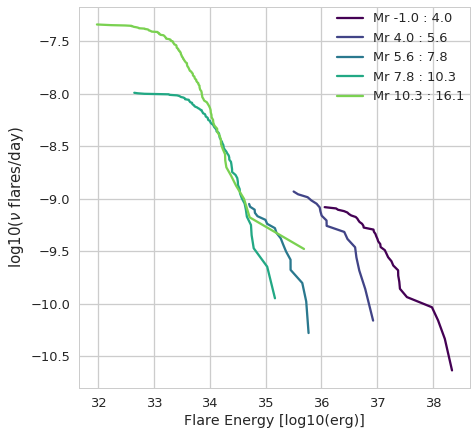

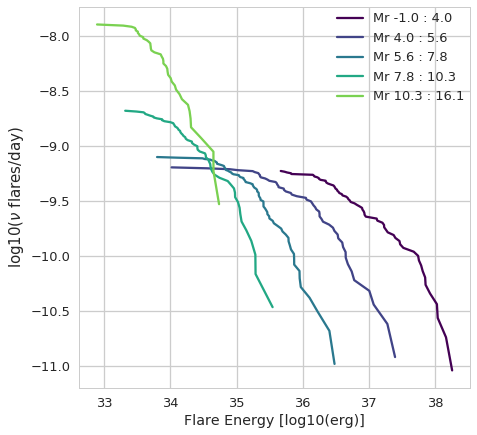

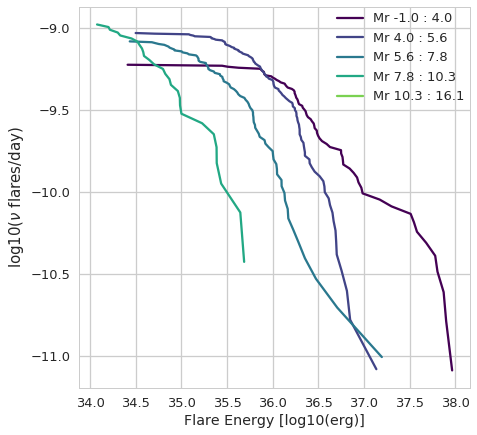

In [361]:
ffdiagram_binned(height1_flare, height1_all, bins=mr_galbins)
ffdiagram_binned(height2_flare, height2_all, bins=mr_galbins)
ffdiagram_binned(height3_flare, height3_all, bins=mr_galbins)